
Pore Pressure Analysis Using Eaton's Method

--- Steps
1. Data Loading, Cleaning and Processing
2. Estimate the Normal compaction trend line (NCT)
$$
P_{pg}=\sigma v_{g}-\left(\sigma v_{g}-P_{hg}\right)\left(\frac{\Delta t_n}{\Delta t}\right)^m 
$$

$$
\Delta t_n=\Delta t_m-\left(\Delta t_{ml}-\Delta t_m\right)\,e^{-cz}
$$
3. Estimate Lithostatic Pressure
$$
\sigma v_{g}=\frac{\left(P_{sea}+\int_0^Z\rho_b(Z)\,g\,dZ\right)-P_{sea}}{Z}\label{eq:OBG_def}=\frac{\int_0^Z\rho_b(Z)\,dZ}{Z}\,g\
$$

4. Estimate Hydrostatic Pressure
$$
P_{hg}=\frac{(P_{sea}+\rho_{w}\,g\,Z)-P_{sea}}{Z}=\rho_w\,g\\
$$

5. Etimate of Pore Pressure using Eaton's Equation

$$
P_{pg}=\sigma v_{g}-\left(\sigma v_{g}-P_{hg}\right)\left(\frac{\Delta t_n}{\Delta t}\right)^m 
$$


$$
P_f=P_{sea}+P_{pg} Z
$$


6. Estimate effective stress from classical Terzaghi's Equation

$$
σ_{v} = σ_{e} - P_{f}
$$

7. Estimate of Lithostatic Load and Pore Pressure excess ratios 
$$
\lambda^* = \frac{(P_{f} - P_{hydro})} {(P_{litho} - P_{hydro})}
$$ 

$$
P^*=P_{f} - P_{hydro}
$$


$$
\lambda = \frac{P_{f}}{P_{litho}}
$$
     

Where:        
$\Delta t_m$: is the transit time in the shale matrix  , $\Delta t_{ml}$: is the transit time at the mudline ($Z = 0$), $Z$: is the true vertical depth below the mudline (mbsf), $c$: is the compaction parameter, $σ_{e}$: is the effective stress, $P_{f}$: is the pore pressure, $P_{pg}$: is the pore pressure gradient, $σ_{vg}$: is the overburden pressure, $P_{hg}$: hydrostatic pressure gradient, $P_{hg}$: hydrostatic pressure gradient    


In [1]:
# plots
# import exp358
import os,  sys # for common import for everyone
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib import gridspec
import pandas as pd
import pickle
import lasio  # las files 

import numpy as np
from scipy.interpolate import interp1d

In [2]:
%matplotlib notebook

In [3]:
## folder location will depend on the User and system used
if Path.home().name in ['pwavodij']: # personal 
    Dropbox_folder = Path(Path.home(), 'Dropbox') 

# Reading data

In [4]:
# Read a LAS file 
df=lasio.read(Path(Dropbox_folder,'Wabi-05.las'))
df=df.df().reset_index()
df.head()

MD  AHT10_3  AHT20_1  AHT30_1  AHT60_1  AHT90_1  AHT90_3  APLC_1  \
0  0.00000      NaN      NaN      NaN      NaN      NaN      NaN     NaN   
1  0.20000      NaN      NaN      NaN      NaN      NaN      NaN     NaN   
2  0.20002      NaN      NaN      NaN      NaN      NaN      NaN     NaN   
3  0.40000      NaN      NaN      NaN      NaN      NaN      NaN     NaN   
4  0.40003      NaN      NaN      NaN      NaN      NaN      NaN     NaN   

   APLC_2  APLC_4  ...  TNPL_2  TNPL_3    TVD_1   TVDSS_1  VCL_1  VPVS_1  \
0     NaN     NaN  ...     NaN     NaN  0.00000 -21.60000    NaN     NaN   
1     NaN     NaN  ...     NaN     NaN  0.19998 -21.40001    NaN     NaN   
2     NaN     NaN  ...     NaN     NaN  0.20000 -21.39999    NaN     NaN   
3     NaN     NaN  ...     NaN     NaN  0.39997 -21.20001    NaN     NaN   
4     NaN     NaN  ...     NaN     NaN  0.40000 -21.19998    NaN     NaN   

   WAV-RICKER_25HZ_ROT0_1_1  WAV-RICKER_25HZ_ROT0_1_2  ZOEP-REFL-EI-0_1  \
0                       NaN                       NaN               NaN   
1                       NaN                       NaN               NaN   
2                       NaN                       NaN               NaN   
3                       NaN                       NaN               NaN   
4                       NaN                       NaN               NaN   

   ZOEP-REFL-EI-30_1  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  

[5 rows x 133 columns]

In [5]:
# df=df.dropna() #remove nans in the entire dataFrame
# df.head()

<IPython.core.display.Javascript object>


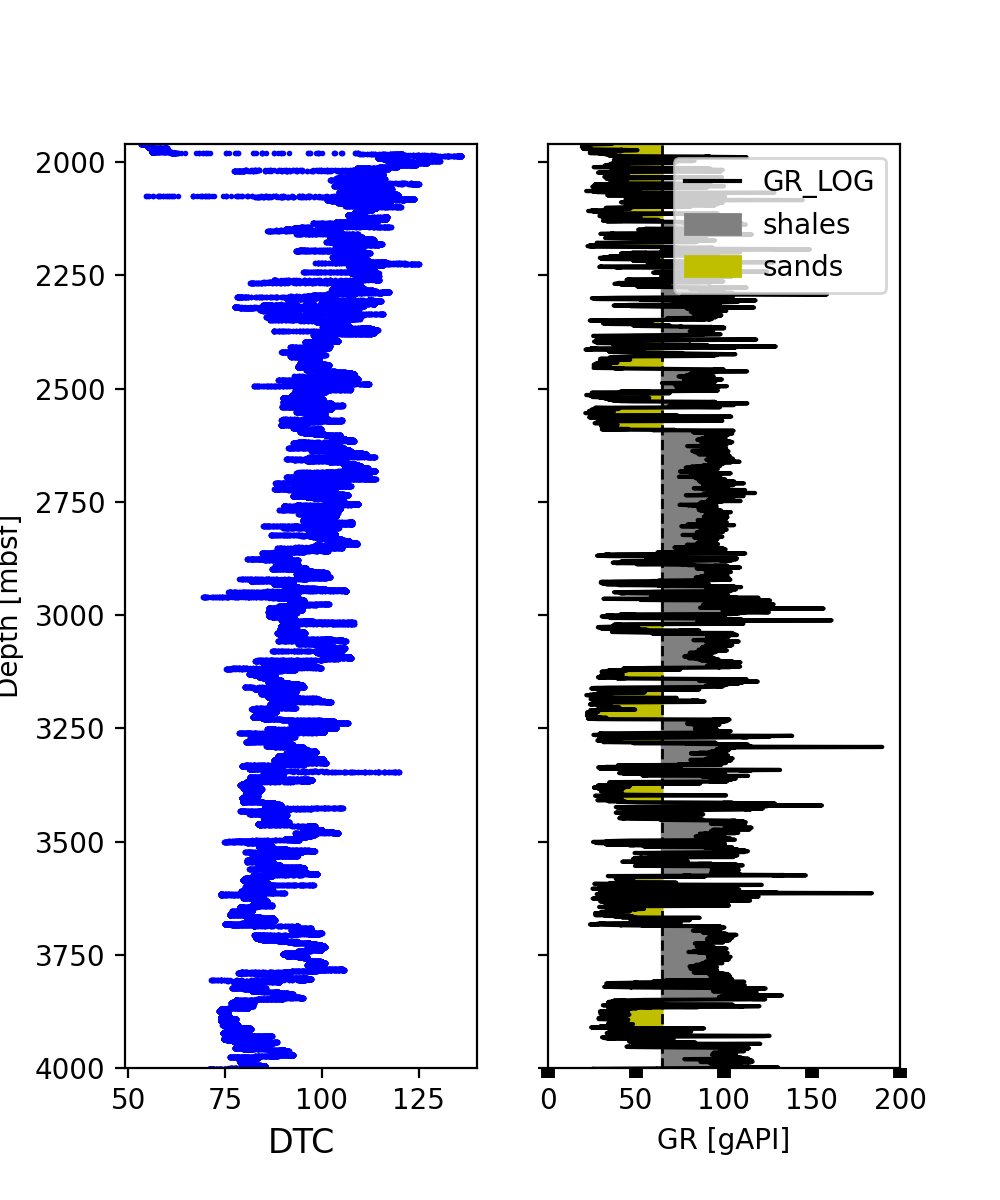

In [6]:
fig,axs=plt.subplots(1,2,figsize=(5,6),sharey=True)
ax=axs[0]
ax.scatter(df['DTCO_1'],df['MD'], c='b', s=1,label='DTC')

ax.set_xlabel('DTC',fontsize='large')
ax.set_ylabel('Depth [mbsf]')
ax.set_ylim(1960,4000)
ax.invert_yaxis()

ax=axs[1]
ax.plot(df['GR_1'],df['MD'], label='GR_LOG', c='k')
ax.xaxis.label.set_color("k")
ax.tick_params(axis='x', colors="k", width=5)
ax.spines["top"].set_edgecolor("k")
ax.set_xlabel('GR [gAPI]')

ax.set_xlim(0,200)
ax.fill_betweenx(df['MD'],df['GR_1'],65,
                           where=df['GR_1']>65,interpolate=True,color='gray', label='shales')
ax.fill_betweenx(df['MD'],df['GR_1'],65,
                           where=df['GR_1']<65,interpolate=True,color='y', label='sands')
ax.axvline(65,color='k',linewidth=1,linestyle='--')
ax.spines["top"].set_position(("axes", 1.0))
ax.legend(loc='upper right')

In [8]:
df[['MD','TVD_1','TVDSS_1' ]].describe()

MD          TVD_1        TVDSS_1
count  182544.000000  182525.000000  182127.000000
mean     2563.054326    2389.996840    2363.698785
std      1196.337226    1086.968397    1084.757524
min         0.000000       0.000000     -21.600000
25%      1782.127532    1714.921850    1689.013335
50%      2716.619630    2517.881820    2491.874330
75%      3555.961853    3267.617630    3239.461940
max      6291.245110    4117.400060    4074.790530

# Data Processing

## Depth sampling

In [9]:
d_seawater= 1.024
g=9.81
Mudline = 1960 # Seafloor: This an assumed value showing first recorded data points in the well logs.
# Pressure at the Seafloor
P_mudline = d_seawater * g * Mudline*1000
P_mudline

19689062.400000002

In [10]:
df['Travel_Time']= df['DTCO_1'] # renamed the column
df['Travel_Time'].describe()
# .................................................................
df['MD_mbsf']= df['MD_1'] - Mudline
df = df[df['MD_mbsf']>0].copy()
df['MD_mbsf'].describe()

count    132116.000000
mean       1216.949056
std         697.765704
min           0.000030
25%         611.190550
50%        1222.298710
75%        1825.097160
max        2449.800070
Name: MD_mbsf, dtype: float64

In [11]:
df['TVD_mbsf'] = df['TVD_1'] - Mudline
df=df[df['TVD_mbsf']>0].copy()
df['TVD_mbsf']

56103        0.00003
56104        0.00708
56105        0.00719
56106        0.02516
56107        0.04054
             ...    
182519    2157.13638
182520    2157.19480
182521    2157.20006
182522    2157.28835
182523    2157.39431
Name: TVD_mbsf, Length: 126421, dtype: float64

In [12]:
df['TVD_1'].max() - df['TVD_1'].min() 
# 123947 125647

2157.3942799999995

In [13]:
# regularly sampled TVD depths
# z_step = 0.0332498 # To get the same number of data as in df
TVD_max=2250.06571
z_step = 0.0179045
TVDs=np.arange(0.45,TVD_max+z_step,z_step)  # z is TVD profile
print(f"Shape {TVDs.shape} from {TVDs.min()} to {TVDs.max()} with steps of {np.diff(TVDs).mean()}")

Shape (125647,) from 0.45 to 2250.0788069999985 with steps of 0.01790449999999999


<IPython.core.display.Javascript object>


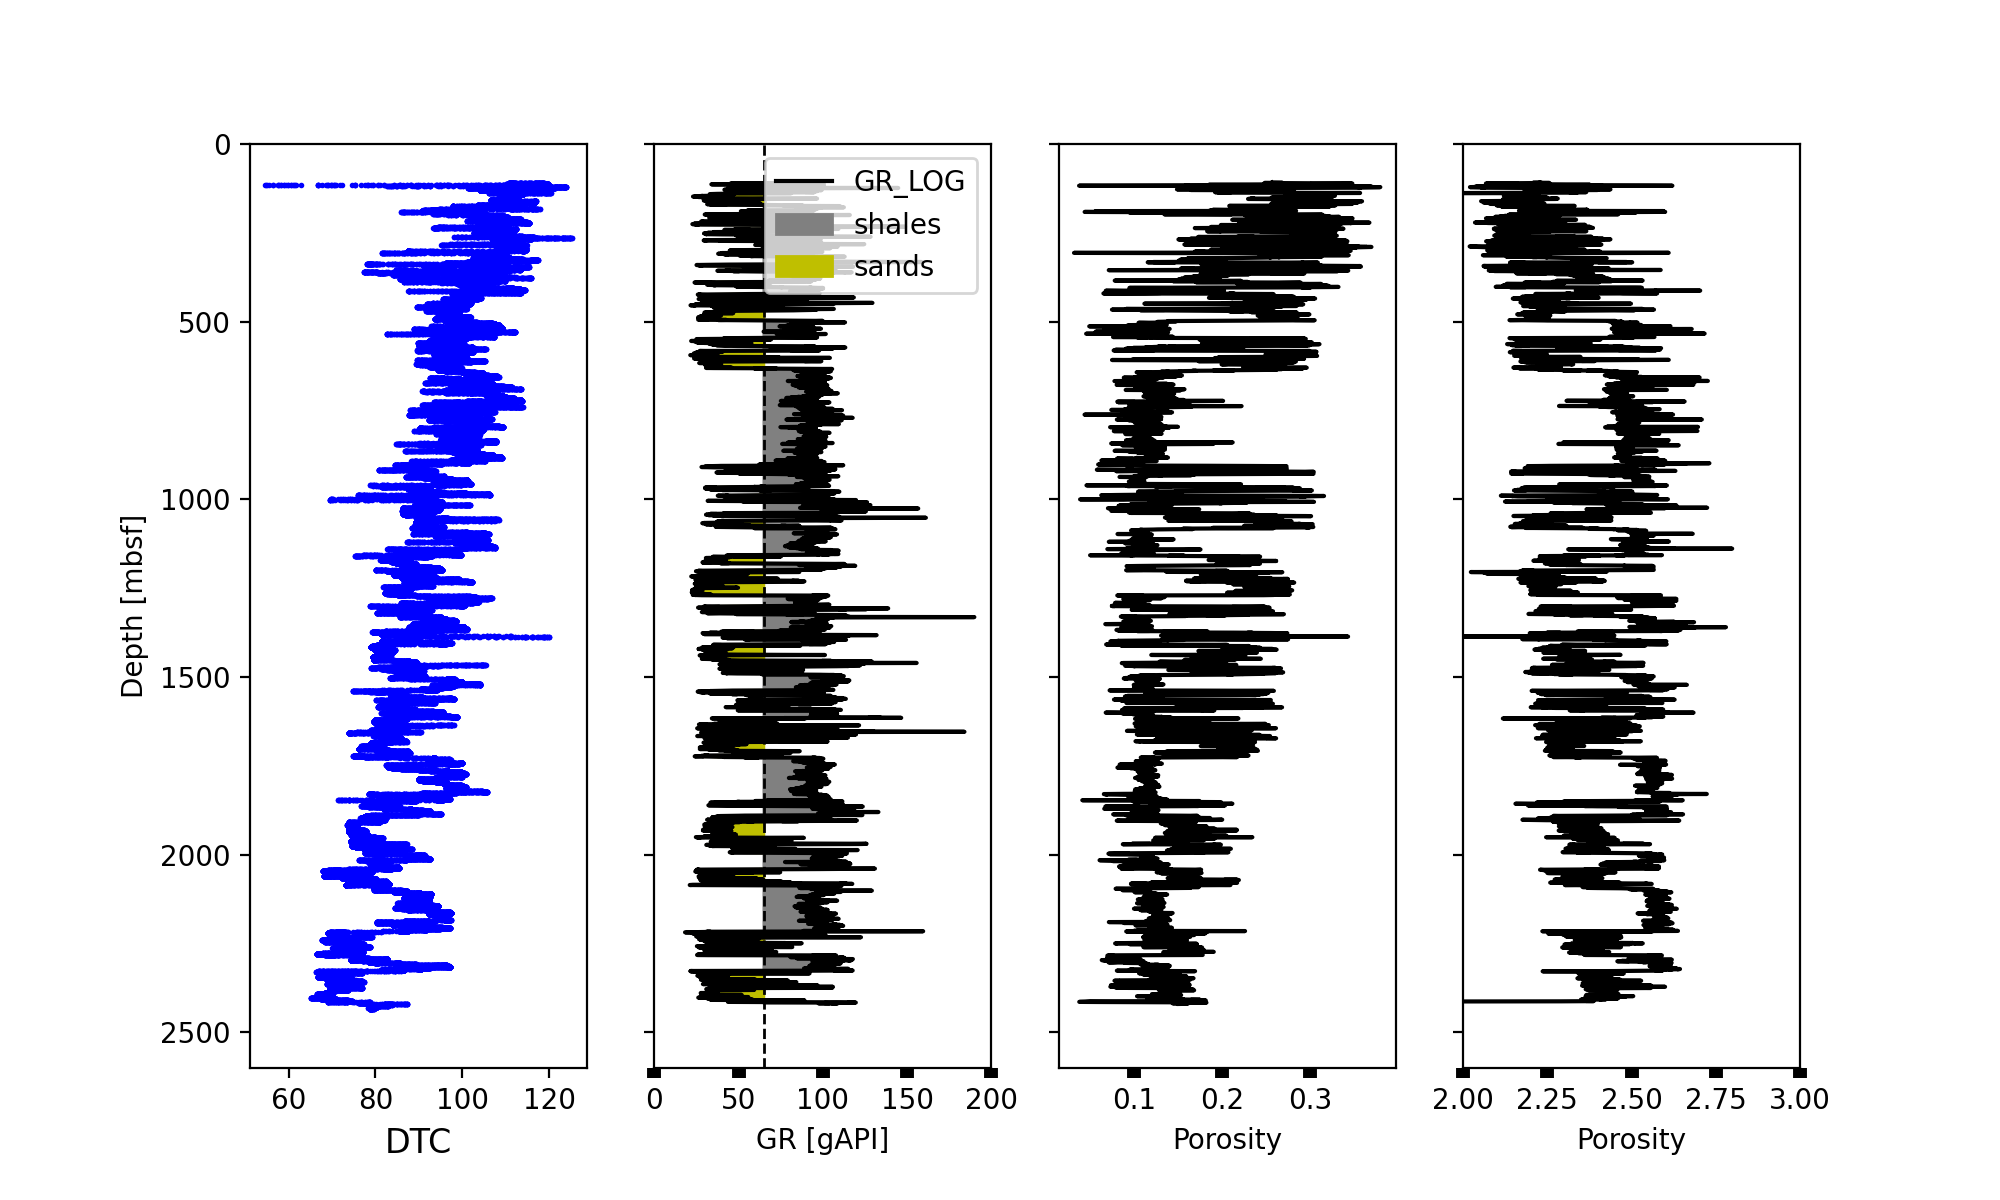

Text(0.5, 0, 'Porosity')

In [14]:
fig,axs=plt.subplots(1,4,figsize=(10,6),sharey=True)
ax=axs[0]
ax.scatter(df['Travel_Time'],df['MD_mbsf'], c='b', s=1,label='DTC')

ax.set_xlabel('DTC',fontsize='large')
ax.set_ylabel('Depth [mbsf]')
ax.set_ylim(0,2600)
ax.invert_yaxis()

ax=axs[1]
ax.plot(df['GR_1'],df['MD_mbsf'], label='GR_LOG', c='k')
ax.xaxis.label.set_color("k")
ax.tick_params(axis='x', colors="k", width=5)
ax.spines["top"].set_edgecolor("k")
ax.set_xlabel('GR [gAPI]')

ax.set_xlim(0,200)
ax.fill_betweenx(df['MD_mbsf'],df['GR_1'],65,
                           where=df['GR_1']>65,interpolate=True,color='gray', label='shales')
ax.fill_betweenx(df['MD_mbsf'],df['GR_1'],65,
                           where=df['GR_1']<65,interpolate=True,color='y', label='sands')
ax.axvline(65,color='k',linewidth=1,linestyle='--')
ax.spines["top"].set_position(("axes", 1.0))
ax.legend(loc='upper right')


ax=axs[2]
ax.plot(df['PHIT_1'],df['MD_mbsf'], label='Porosity', c='k')
# ax.plot(df['PHIE_1'],df['MD'], label='GR_LOG', c='b')

ax.xaxis.label.set_color("k")
ax.tick_params(axis='x', colors="k", width=5)
ax.spines["top"].set_edgecolor("k")
ax.set_xlabel('Porosity')

ax=axs[3]
ax.plot(df['RHOZ_1'],df['MD_mbsf'], label='Density', c='k')

# ax.plot(df['PHIE_1'],df['MD'], label='GR_LOG', c='b')
ax.set_xlim(2,3)

ax.xaxis.label.set_color("k")
ax.tick_params(axis='x', colors="k", width=5)
ax.spines["top"].set_edgecolor("k")
ax.set_xlabel('Porosity')




filtering: obtaining several median filters to have reasonable data without much outliers 


## Normal compaction trend (NCT)

In [15]:
def med_filt(window=1500):
    min_per = 1 # to avoid getting NaN if there is a single NaN, I request to have at least min_per real numbers in the window
    df[f'Travel_Time_{window}']= df['Travel_Time'].rolling(window,min_periods=min_per, center=True).median()
med_filt(300)
med_filt(150)
# noisier but should capture the anomaly at the bottom of the well
# med_filt(15) # much noisier but should capture the anomaly at the bottom of the well

<IPython.core.display.Javascript object>


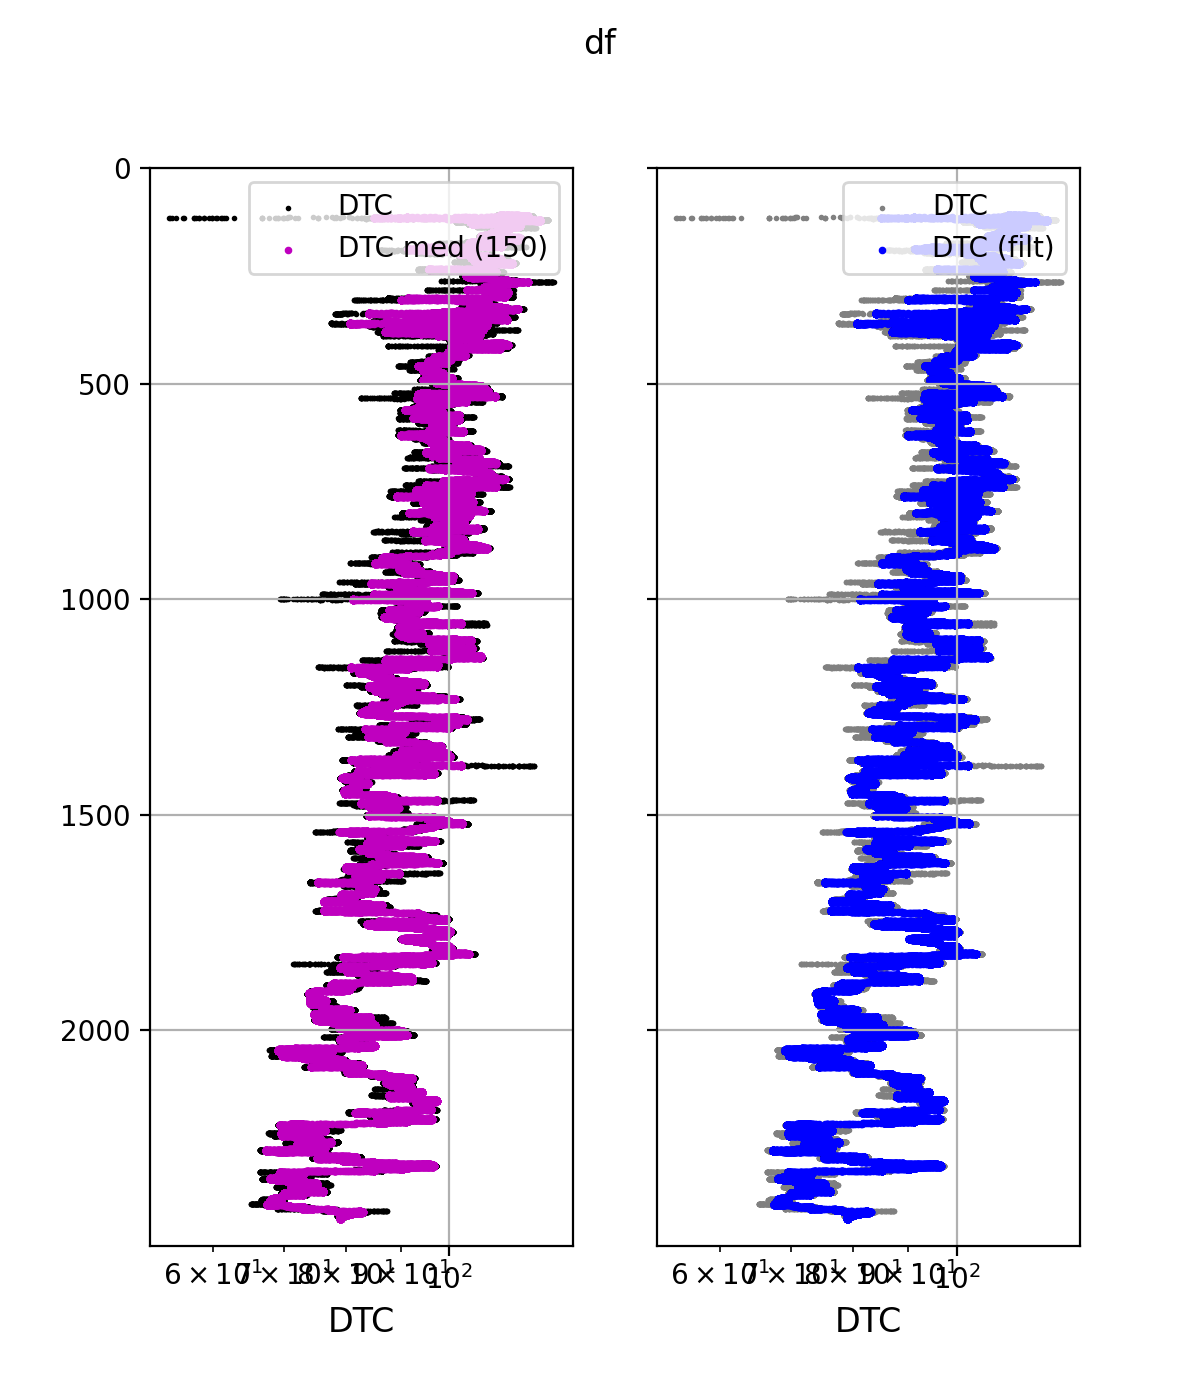

Text(0.5, 0.98, 'df')

In [16]:
fig,ax=plt.subplots(1,2, sharey=True,figsize=(6,7))

ax[0].scatter(df['Travel_Time'],df['MD_mbsf'], c='k', s=1,label='DTC')
ax[0].scatter(df['Travel_Time_150'],df['MD_mbsf'], c='m', s=3,label='DTC med (150)')
ax[0].set_xlabel('DTC',fontsize='large')
yticks_list=np.arange(0,2500,500)
ax[0].set_yticks(yticks_list)
ax[0].set_xscale('log')

ax[1].scatter(df['Travel_Time'],df['MD_mbsf'], c='gray', s=1,label='DTC')
ax[1].scatter(df['Travel_Time_150'],df['MD_mbsf'],c='b',s=3,label='DTC (filt)')
ax[1].set_xlabel('DTC',fontsize='large')
yticks_list=np.arange(0,2500,500)
ax[1].set_yticks(yticks_list)
# ax[1].set_xlim(0,10)
ax[1].set_ylim(2500,0)
ax[1].set_xscale('log')

for a in ax:
    a.grid(True)
    a.legend(loc='upper right')
fig.suptitle('df')

<IPython.core.display.Javascript object>


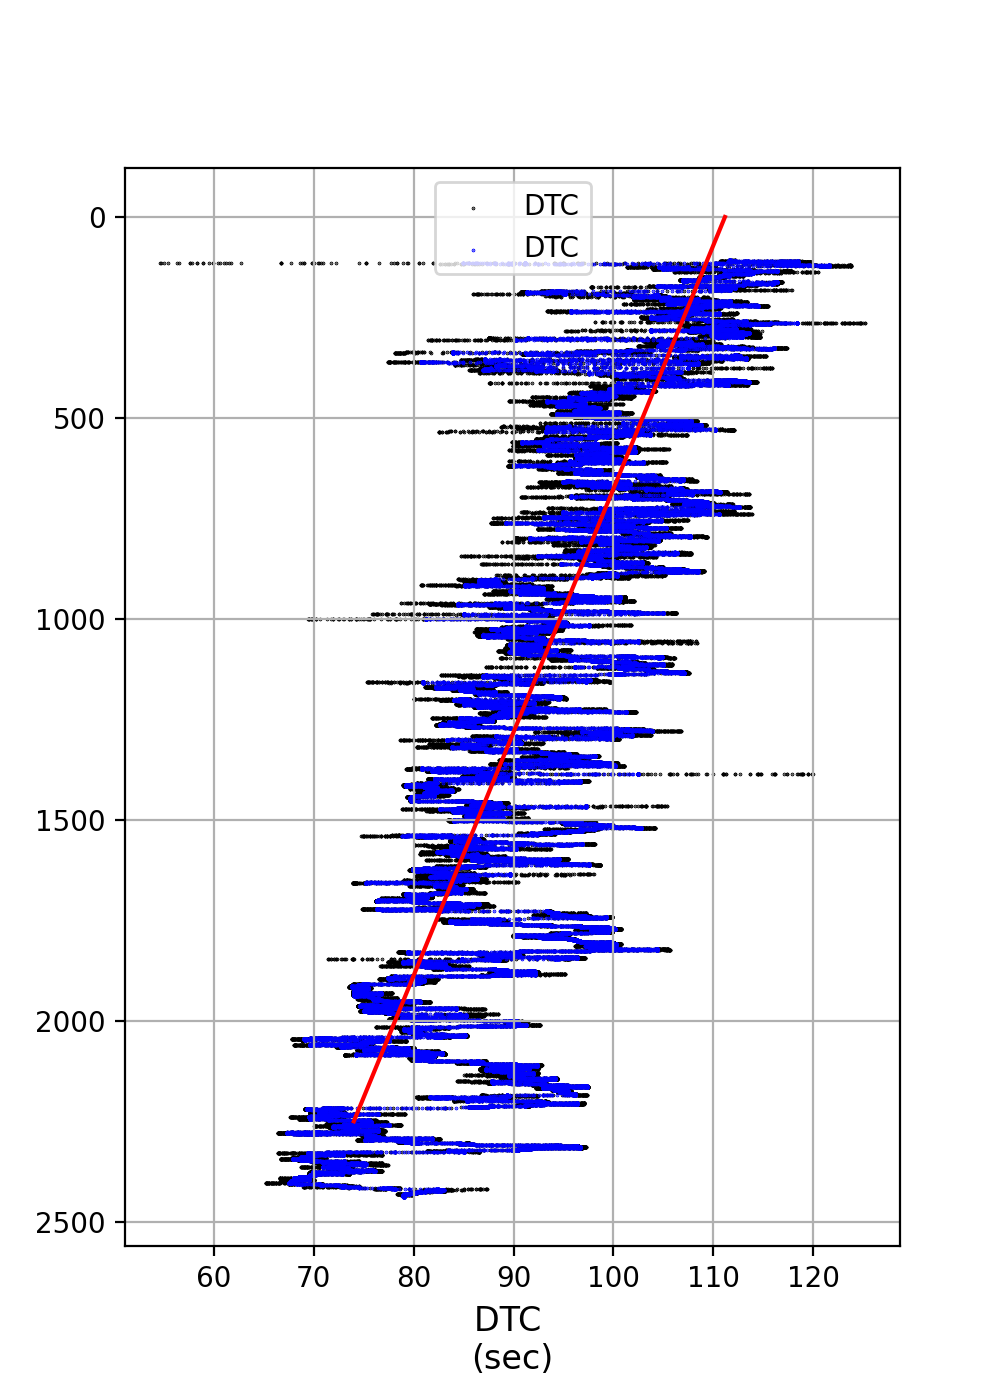

-0.01651212397167 111.17115806186976


In [17]:
fig,ax=plt.subplots(figsize=(5,7))


ax.scatter(df['Travel_Time'],df['MD_mbsf'],c='black',label='DTC', s=0.1)
ax.scatter(df['Travel_Time_150'],df['MD_mbsf'],c='b',label='DTC', s=0.1)
ax.set_xlabel('DTC \n(sec)',fontsize='large')
ax.legend(loc='upper center')
ax.grid()
ax.invert_yaxis()

n_smooth = 150
x_unit_trend=df['Travel_Time_150'].rolling(n_smooth).median()
y_unit_trend=df['MD_mbsf'].rolling(n_smooth).median()
# # remove the nans
x_unit_trend=np.where(x_unit_trend<0.01,np.nan,x_unit_trend) # remove the 0
mask = ~np.isnan(x_unit_trend)
x_unit_trend=x_unit_trend[mask]
y_unit_trend=y_unit_trend[mask]
mask = ~np.isnan(y_unit_trend)
x_unit_trend=x_unit_trend[mask]
y_unit_trend=y_unit_trend[mask]

fit_data = (y_unit_trend>500)&(y_unit_trend<1060)
pol_fit = np.polyfit(y_unit_trend[fit_data],x_unit_trend[fit_data],1)

Rn_extrap = np.polyval(pol_fit,TVDs)

ax.plot(Rn_extrap,TVDs,'red',label='Dn (unit)')
slope = pol_fit[0]
intercept = pol_fit[1]

# Exp358_Hydro.underlay_units(ax,alpha=0.5)
print (slope, intercept)

$$
\Delta t_n=\Delta t_m-\left(\Delta t_{ml}-\Delta t_m\right)\,e^{-cz}
$$

Resolving exponential relationship

In [62]:
def DTc_NCT (DTm,DTml, TVDs, c=7.8000000e-04):
    
    """
    DESCRIBE IN A FEW WORDS WHAT YOU WANT TO DO
    Estimate the normal compaction DT for any depth
    input is depth
    DTml, DTm and c are parameters
    
    DTm = Transit time in Shale matrix us/m
    Intercept = DTml = Transit time in Mudline (z=0) us/m
    1/c = characteristic compaction depth 
    z: depth mbsf
    """  
    return DTm + (DTml - DTm) *  np.exp(-c*TVDs)

In [63]:
fit_interval = [500,1060] # numbers obtained from the plot above 

def error_DT(x):
    """
    We want to mimize the mismatch (DT(z)-DTmeasured)**2 
    summed over the fit interval
    
    x is [DTml, DTm,c]
    
    y_unit_trend: input -> depth
    x_unit_trend: ouput -> DT
    """
    mask = (y_unit_trend>fit_interval[0])&(y_unit_trend<fit_interval[1])
    pred = np.array([DTc_NCT(x[0], x[1],z, x[2]) for z in y_unit_trend[mask]])
    return np.sqrt(np.sum((pred-x_unit_trend[mask])**2))

In [64]:
error_DT([6.802022e+01, 1.16000e+02, 7.8000000e-04])

1170.3873862790515

In [66]:
from scipy.optimize import minimize

res = minimize(error_DT, x0=[6.802022e+01, 1.16000e+02, 7.8000000e-04])
print(res)

/var/folders/tk/dcwsd9m50476mx54d6mxfp_00000gn/T/ipykernel_13588/38927980.py:14: RuntimeWarning: overflow encountered in double_scalars
  return DTm + (DTml - DTm) *  np.exp(-c*TVDs)
/var/folders/tk/dcwsd9m50476mx54d6mxfp_00000gn/T/ipykernel_13588/38927980.py:14: RuntimeWarning: overflow encountered in exp
  return DTm + (DTml - DTm) *  np.exp(-c*TVDs)
/Users/pwavodij/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/var/folders/tk/dcwsd9m50476mx54d6mxfp_00000gn/T/ipykernel_13588/38927980.py:14: RuntimeWarning: overflow encountered in double_scalars
  return DTm + (DTml - DTm) *  np.exp(-c*TVDs)
/var/folders/tk/dcwsd9m50476mx54d6mxfp_00000gn/T/ipykernel_13588/38927980.py:14: RuntimeWarning: overflow encountered in exp
  return DTm + (DTml - DTm) *  np.exp(-c*TVDs)


      fun: 1170.3873862790515
 hess_inv: array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])
      jac: array([-4.72475739e+01, -5.44942627e+01,  2.07908331e+06])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 24
      nit: 0
     njev: 3
   status: 2
  success: False
        x: array([6.802022e+01, 1.160000e+02, 7.800000e-04])


In [67]:
def DTc_NCTL (DTm, DTml,TVDs, c=7.8000000e-04): 
    
    """
    DESCRIBE IN A FEW WORDS WHAT YOU WANT TO DO
    Estimate the normal compaction DT for any depth
    input is depth
    DTml, DTm and c are parameters
    
    DTm = Transit time in Shale matrix us/m
    Intercept = DTml = Transit time in Mudline (z=0) us/m
    1/c = caracterstic compaction depth 
    z: depth mbsf
    """  
    return DTm + (DTml - DTm) *  np.exp(-c*TVDs) 

<IPython.core.display.Javascript object>


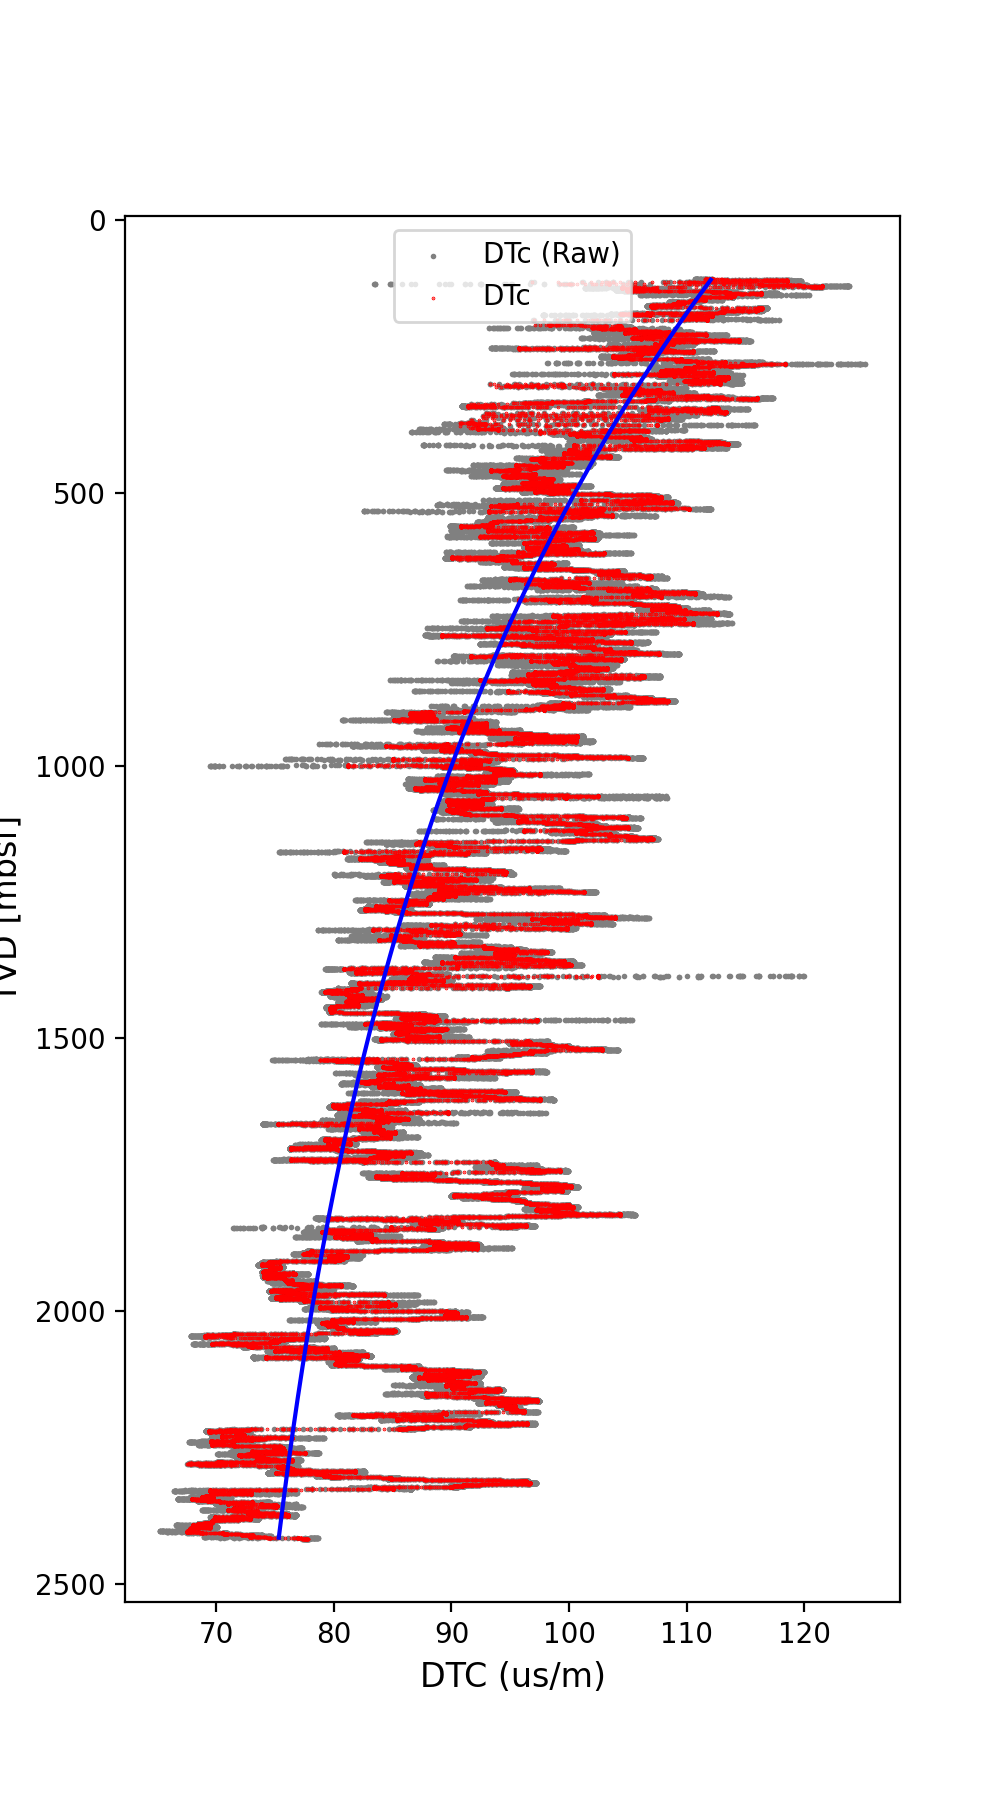

In [68]:
fig,ax=plt.subplots(figsize=(5,9))
ax.scatter(df['Travel_Time'],df['MD_mbsf'],c='gray',label='DTc (Raw)', s=1)
ax.scatter(df['Travel_Time_150'],df['MD_mbsf'],c='RED',label='DTc', s=0.1)
ax.set_xlabel('DTC (us/m)',fontsize='large')
ax.set_ylabel('TVD [mbsf]',fontsize='large')
ax.legend(loc='upper center')
ax.invert_yaxis()


n_smooth = 150
x_unit_trend=df['Travel_Time_150'].rolling(n_smooth).median()
y_unit_trend=df['MD_mbsf'].rolling(n_smooth).median()
mask = (y_unit_trend>fit_interval[0])&(y_unit_trend<fit_interval[1])
x=[6.802022e+01, 1.16000e+02, 7.8000000e-04] # The values are slightly manually changed to have a best fit

pred = np.array([DTc_NCTL(x[0], x[1], z,x[2]) for z in y_unit_trend])
ax.plot(pred,y_unit_trend,'blue')


In [24]:
# Populating NCT to the dataframe

DTm = 6.802022e+01
DTml = 1.16000e+02
# 1.16000e+02, 7.8000000e-04

df['DTc_NCT'] = DTc_NCTL (DTm, DTml, df['MD_mbsf']) 
df['DTc_NCT'].describe()

count    126421.000000
mean         88.370049
std          10.360152
min          75.119090
25%          79.346839
50%          85.795190
75%          96.021988
max         112.110274
Name: DTc_NCT, dtype: float64

<IPython.core.display.Javascript object>


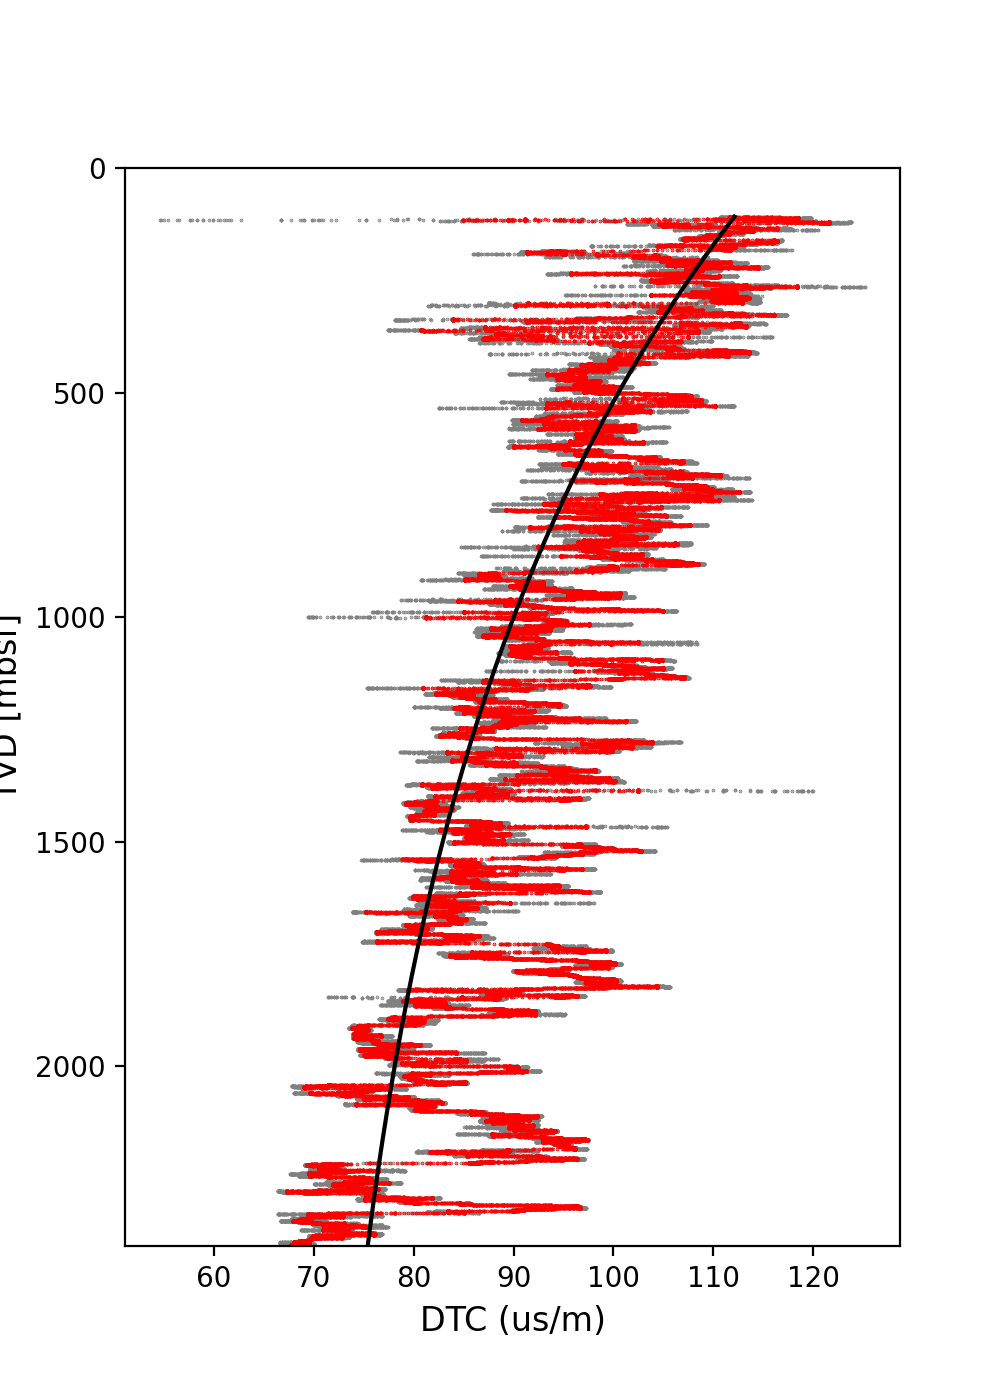

(2400.0, 0.0)

In [25]:
fig,ax=plt.subplots(figsize=(5,7))
ax.plot(df['DTc_NCT'],df['MD_mbsf'],'black',label='Hydrostatic')
ax.scatter(df['Travel_Time'],df['MD_mbsf'],c='gray',label='DTc (Raw)', s=0.1)
ax.scatter(df['Travel_Time_150'],df['MD_mbsf'],c='r',label='DTc', s=0.1)

ax.set_xlabel('DTC (us/m)',fontsize='large')
ax.set_ylabel('TVD [mbsf]',fontsize='large')
ax.set_ylim(2400,0)

# Overburden and Hydrostatic Pressure Estimation

In [26]:
# Remove all data with null porosity
df = df[~df['RHOZ_1'].isnull()].copy()
df = df[df['RHOZ_1']>0].copy()
df['RHOZ_1'].describe()

count    125647.000000
mean          2.399677
std           0.143522
min           1.711700
25%           2.283150
50%           2.414590
75%           2.524560
max           2.798800
Name: RHOZ_1, dtype: float64

In [27]:
bulk_density_from_MD = interp1d(df['MD_mbsf'], df['RHOZ_1'])

## LIthoStatic Pressure

$$
\sigma v_{g}=\frac{\left(P_{sea}+\int_0^Z\rho_b(Z)\,g\,dZ\right)-P_{sea}}{Z}\label{eq:OBG_def}=\frac{\int_0^Z\rho_b(Z)\,dZ}{Z}\,g\
$$

In [28]:
def overburden_pressure(TVDs, bulk_density, p0 = 0):
    """"
    depth : depth in m
    density : bulk density in g/cc
    p0 : pressure at 0. If 0 is mudline -> p0 is mudline
    """
    g = 9.81
    dz = np.concatenate([np.array([np.diff(TVDs).mean()]),np.diff(TVDs)])
    return p0 + np.cumsum(bulk_density*1000*g*dz)

In [29]:
p_lithostatic = overburden_pressure(TVDs=df['TVD_mbsf'], 
                                    bulk_density=df['RHOZ_1'],
                                    p0 = P_mudline)


df['Lithostatic_Pressure_at_bit']=overburden_pressure(TVDs=df['TVD_mbsf'], 
                                    bulk_density=df['RHOZ_1'],
                                    p0 = P_mudline)
df['Overburden_Gradient'] = df['RHOZ_1'] *g*d_seawater*1000 


## Hydrostatic Pressure

$$
P_{hg}=\frac{(P_{sea}+\rho_{w}\,g\,Z)-P_{sea}}{Z}=\rho_w\,g\\
$$

In [30]:
#To get a hydrostatic profile, we will need to provide a function for all depths
def hydrostatic_pressure_from_TVD(TVDs, d_seawater=d_seawater, p0=P_mudline, g=g):
    """
    Compute hydrostatic pressure from TVD
    z : TVD in m
    return P in Pa
    Note that the water density taken here is seawater density (1.028)
    """
    return p0+ d_seawater*g*1000*TVDs #Pa

In [31]:
p_hydrostatic = hydrostatic_pressure_from_TVD(TVDs=df['TVD_mbsf'])
df['Hydrostatic_Pressure_at_bit']=hydrostatic_pressure_from_TVD(TVDs=df['TVD_mbsf'])
df['Hydrostatic_Pressure_at_bit']=hydrostatic_pressure_from_TVD(TVDs=df['TVD_mbsf'])
df['Hydrostatic_Pressure_Gradient']=d_seawater*g*1000  # in Pa / m


# Computing Pore Pressure Gradient (PPG)

$$
P_{pg}=\sigma v_{g}-\left(\sigma v_{g}-P_{hg}\right)\left(\frac{\Delta t_n}{\Delta t}\right)^m 
$$

In [32]:
def compute_PPG_from_Eaton_Transit (obg,hbg,DTc_NCT,DT, Eaton_coefficient = 3):
    """
    OBG = Overburden gradient = Lithostatic_Pressure_Gradient
    HBG = Hydrostatic_Pressure_Gradient
    DTc = shale resistivity
    DT = shale resistivity Normal trend line 
    """
    return obg-(obg-hbg)*(DTc_NCT/DT)**Eaton_coefficient

In [33]:
def compute_PPG_from_Eaton_Transit_df(DT):
    return  compute_PPG_from_Eaton_Transit(
                df['Overburden_Gradient'],
                df['Hydrostatic_Pressure_Gradient'],
                 df['DTc_NCT'], df[DT])

# df['Pore_Pressure_Gradient_DT']=compute_PPG_from_Eaton_Transit_df('Travel_Time_750')
df['Pore_Pressure_Gradient_DT']=compute_PPG_from_Eaton_Transit_df('Travel_Time_150')
df['Pore_Pressure_Gradient_DT_raw']=compute_PPG_from_Eaton_Transit_df('Travel_Time')

In [34]:
DTc_NCT_from_TVD = interp1d(df['TVD_mbsf'],
                        df['DTc_NCT'],
                                      fill_value='extrapolate')
DTc_NCT= DTc_NCT_from_TVD(TVDs)
print(f"Shape of DTc_NCT {DTc_NCT.shape} min: {DTc_NCT.min()} max: {DTc_NCT.max()} mean: {DTc_NCT.mean()}")

Shape of DTc_NCT (125647,) min: 74.59080681785548 max: 112.09209808424949 mean: 87.1386895831483


$$
P_f=P_{sea}+P_{pg} Z
$$

In [35]:
def compute_ppg_from_TVD(TVDs,DT_column='Travel_Time_150',df=df,
                         obg = df['Overburden_Gradient'],
                         hbg=df['Hydrostatic_Pressure_Gradient'],Eaton_coefficient=3):
    df_clean = df[df[DT_column].notna()].copy() # Mai : remove nan
    DT_from_TVD = interp1d(df_clean['TVD_mbsf'],
                            df_clean[DT_column],
                            fill_value=(df_clean.loc[df_clean.index[0],DT_column],
                                        df_clean.loc[df_clean.index[-1],DT_column]),bounds_error=False) # Mai : avoid excentric data at the end
#                            fill_value='extrapolate')
    DT = DT_from_TVD(TVDs)
    mask = np.isnan(DT)
    DT[mask] = np.interp(np.flatnonzero(mask), np.flatnonzero(~mask), DT[~mask])
    return compute_PPG_from_Eaton_Transit (obg,hbg,DTc_NCT,DT,
                                              Eaton_coefficient=Eaton_coefficient)

def put_ppg_above_hydrostatic(ppg, d_water = d_seawater):
    """    
    If PPG is less than hydrostatic, it is put above hydrostatic
    """
    return np.where(ppg<d_water*1000*g,d_water*1000*g,ppg)

def put_ppg_to_hydrostatic_on_top(ppg,zlim=0,z=TVDs, d_water = d_seawater):
    """    
    If depth is less than a threshold depth, ppg is set to hydrostatic
    """
    return np.where(z<0,d_water*1000*g,ppg)

def compute_pore_pressure_from_TVD(TVDs,DT_column='Travel_Time_150',
                                   hydro_until=None,Eaton_coefficient=3):
    ppg = compute_ppg_from_TVD(TVDs,DT_column=DT_column,Eaton_coefficient=Eaton_coefficient)
    if hydro_until is not None:
        ppg = put_ppg_to_hydrostatic_on_top(ppg,zlim=hydro_until)
    p = P_mudline + ppg * TVDs
    return p,ppg

In [36]:
top_hydro = 0
ppg_150_DT = compute_ppg_from_TVD(TVDs = df['TVD_mbsf'])
# ppg_150_DT = compute_ppg_from_TVD(TVDs,DT_column='Travel_Time_150')
ppg_raw_DT = compute_ppg_from_TVD(TVDs,DT_column='Travel_Time',)

pore_pressure_150_DT,ppg_1500_DT_cut = compute_pore_pressure_from_TVD(TVDs,hydro_until=top_hydro)
pore_pressure_150_DT,ppg_150_cut   = compute_pore_pressure_from_TVD(TVDs,DT_column='Travel_Time_150',hydro_until=top_hydro)
pore_pressure_raw_DT,ppg_raw_DT_cut  = compute_pore_pressure_from_TVD(TVDs,DT_column='Travel_Time',hydro_until=top_hydro)

In [37]:
# ....................PPG..........................
pore_pressure_gradient_interpolation_raw= interp1d(TVDs,ppg_raw_DT,fill_value='extrapolate')
df['Pore_Pressure_gradient_DT_raw']=pore_pressure_gradient_interpolation_raw(df['TVD_mbsf'])
# df['Pore_Pressure_gradient_DT_raw']=df['Pore_Pressure_gradient_DT_raw'].iloc[2300:121500]

# .....................PORE_PRESSURE_.....................................
pore_pressure_interpolation_raw=interp1d(TVDs,pore_pressure_raw_DT,fill_value='extrapolate')
df['Pore_Pressure_Estimated_DT_raw']=pore_pressure_interpolation_raw(df['TVD_mbsf'])
# df['Pore_Pressure_Estimated_DT_raw']=df['Pore_Pressure_Estimated_DT_raw'].iloc[2300:121500]

# ......................PORE_PRESSURE_Sampled_1500_points....................................
pore_pressure_interpolation=interp1d(TVDs,pore_pressure_150_DT,fill_value='extrapolate')
df['Pore_Pressure_Estimated_DT']=pore_pressure_interpolation(df['TVD_mbsf'])
# df['Pore_Pressure_Estimated_DT']=df['Pore_Pressure_Estimated_DT'].iloc[2300:121500]


<IPython.core.display.Javascript object>


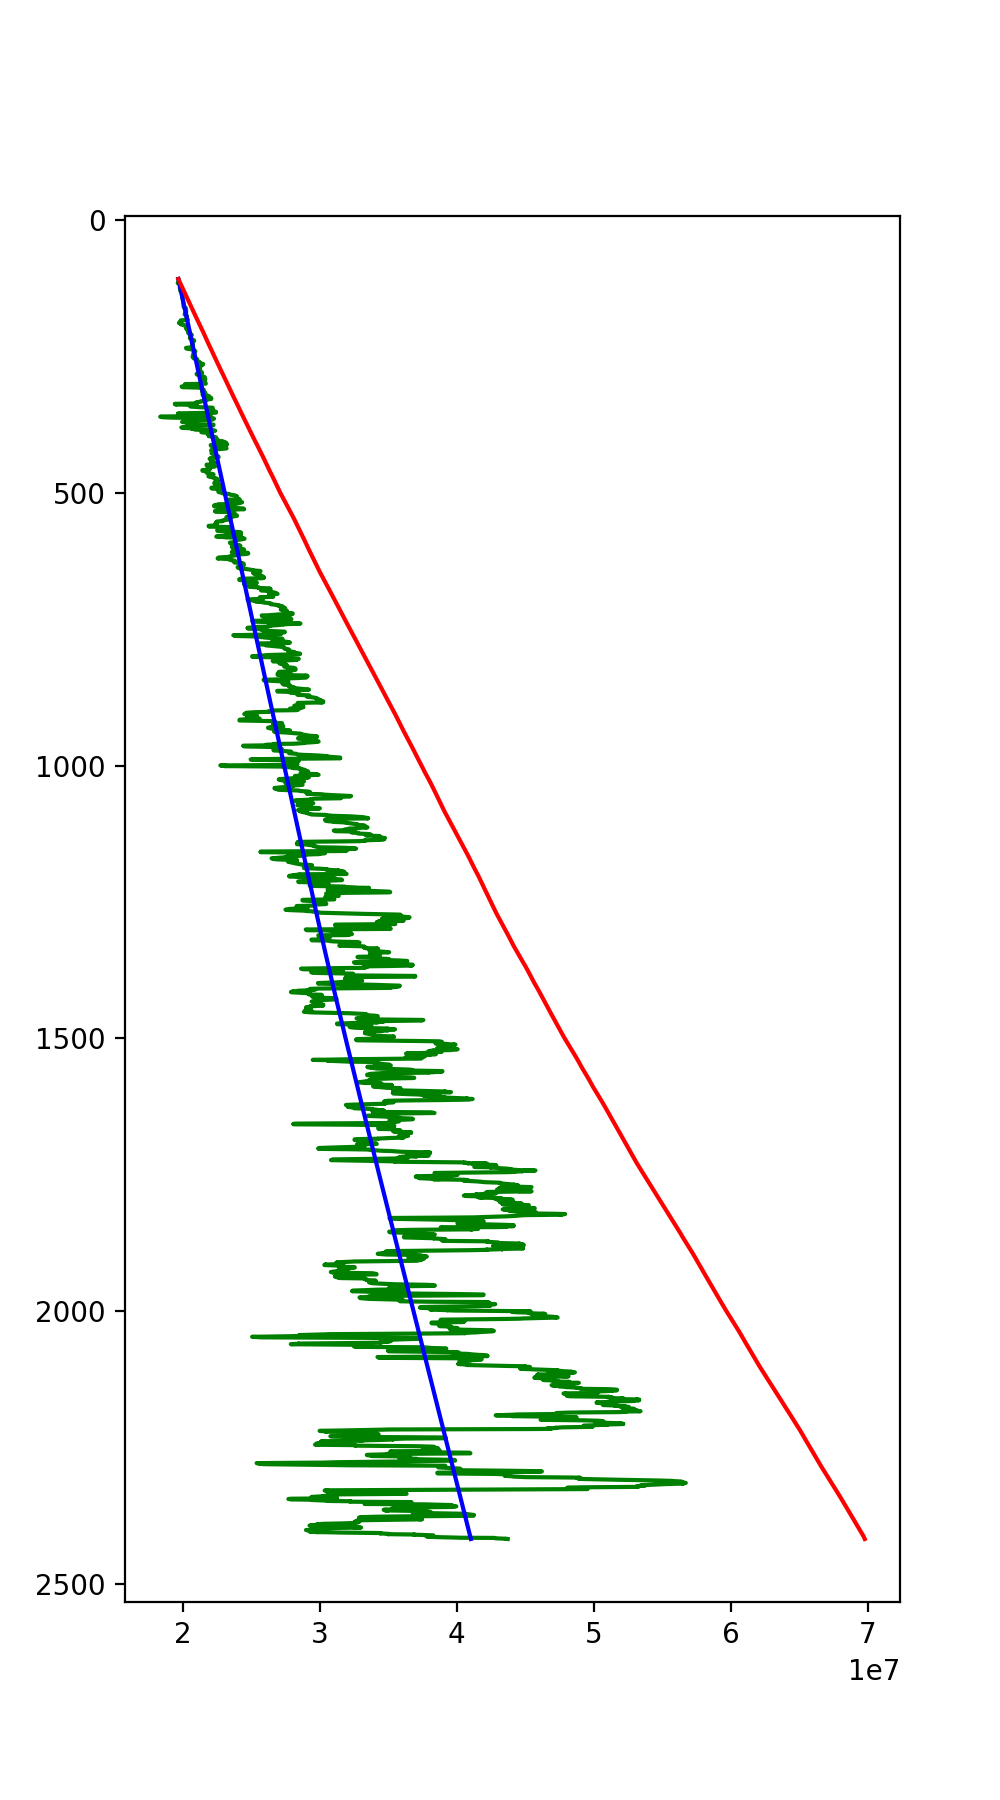

In [38]:
fig,ax=plt.subplots(figsize=(5,9))
# ax.plot(pore_pressure_1500_DT,TVDs,'r')
ax.plot(df['Pore_Pressure_Estimated_DT'],df['MD_mbsf'],'g')

ax.plot(df['Hydrostatic_Pressure_at_bit'],df['MD_mbsf'],'b')
ax.plot(df['Lithostatic_Pressure_at_bit'],df['MD_mbsf'],'r')

ax.invert_yaxis()

<IPython.core.display.Javascript object>


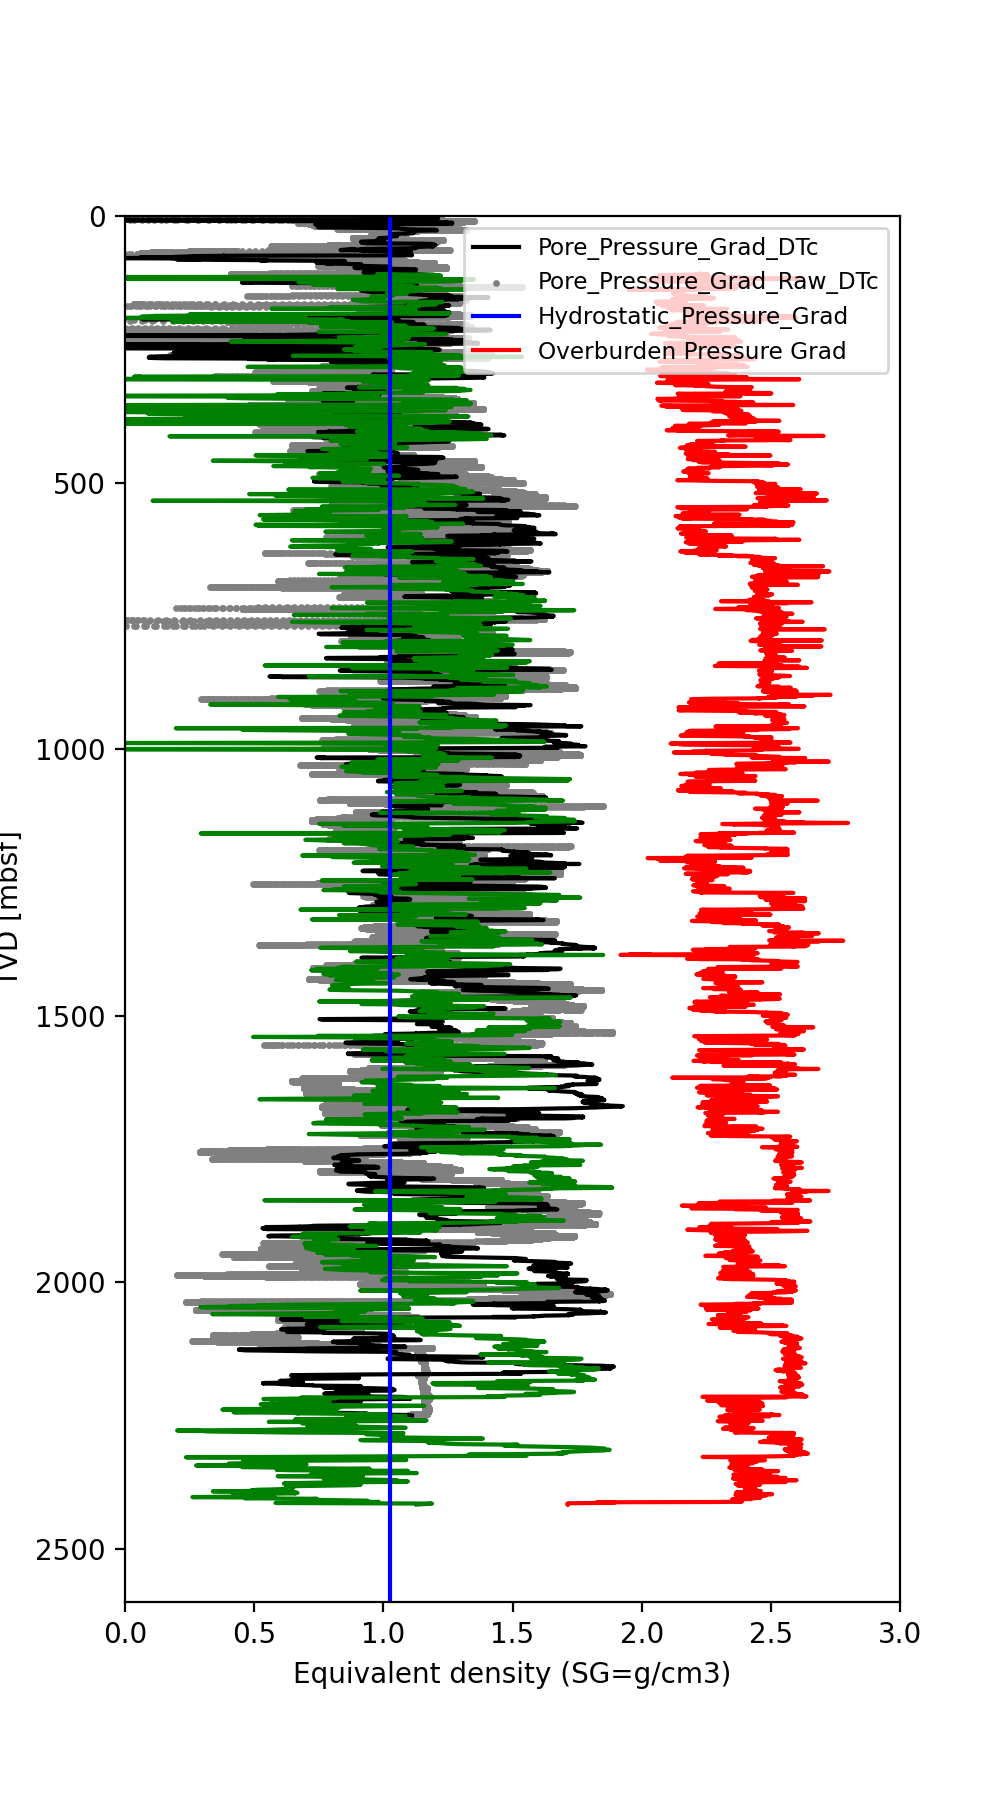

Text(0, 0.5, 'TVD [mbsf]')

In [39]:
# Check whether the compute PPG is sensible. 
# It should be between water density and bulk density of the rock
#using this is to ensure all plotes are of the same units. /g/pas_per_meter_to_psi_per_foot/1e6 
fig, ax=plt.subplots(figsize=(5,9))
ax.plot(ppg_150_DT/g/1000,TVDs,'k',label='Pore_Pressure_Grad_DTc')
ax.scatter(ppg_raw_DT/g/1000,TVDs,c='gray',s=2,label='Pore_Pressure_Grad_Raw_DTc')
ax.plot(df['Pore_Pressure_gradient_DT_raw']/g/1000,df['MD_mbsf'],
           c='g')
ax.axvline(d_seawater,color='b',label='Hydrostatic_Pressure_Grad')
ax.plot (df['RHOZ_1'],
         df['MD_mbsf'],'r',label='Overburden Pressure Grad') 
# ax.axvline(1.2,color='orange',label='Mud_weight')

ax.legend(fontsize='small',loc='upper right')
ax.set_xlim(0,3)

ax.set_ylim(2600,0)
ax.set_xlabel('Equivalent density (SG=g/cm3)')
ax.set_ylabel('TVD [mbsf]')

<IPython.core.display.Javascript object>


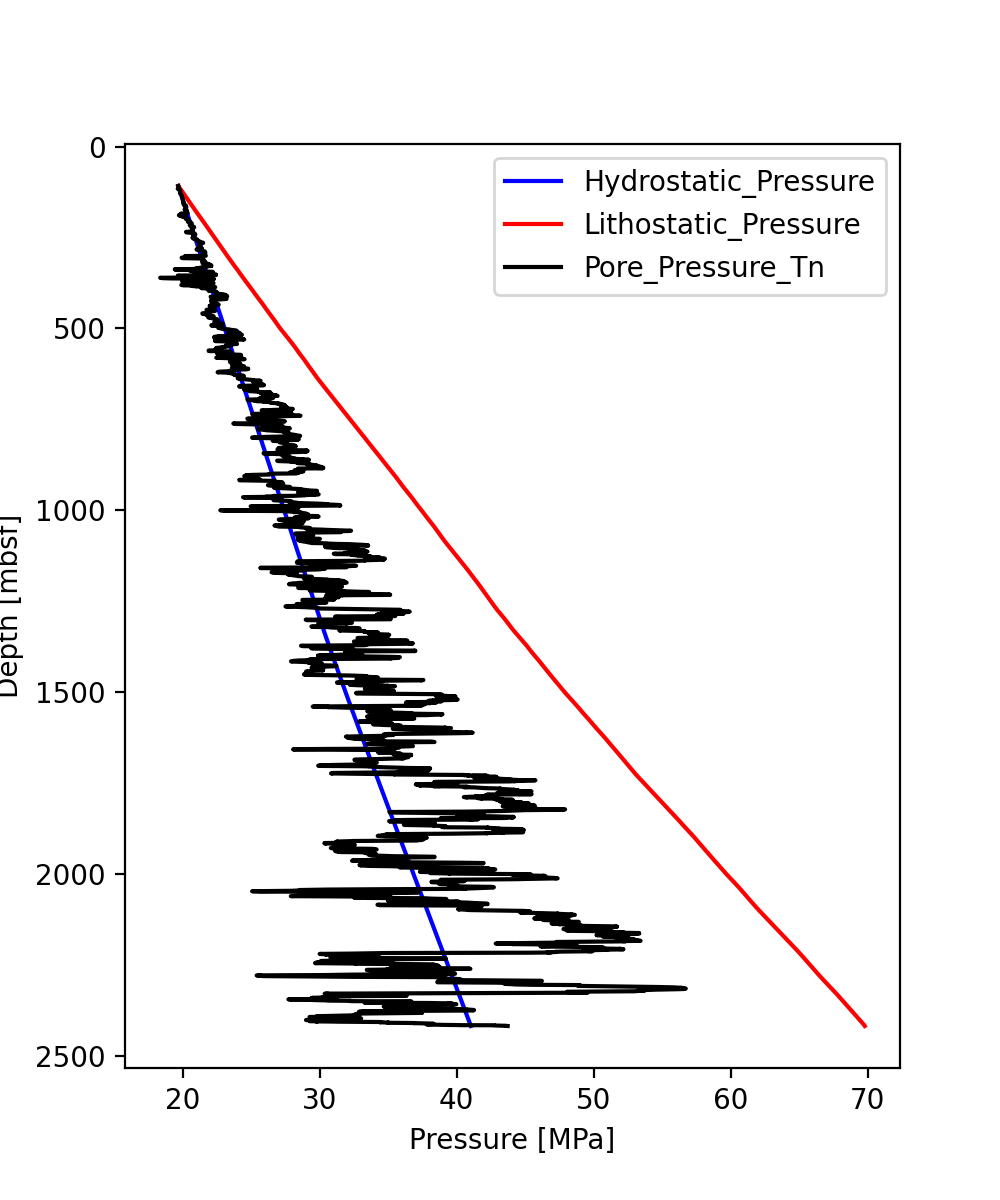

In [40]:
fig,ax=plt.subplots(figsize=(5,6))
ax.plot(df['Hydrostatic_Pressure_at_bit']/1e6,df['MD_mbsf'],'b',label='Hydrostatic_Pressure')
ax.plot(df['Lithostatic_Pressure_at_bit']/1e6,df['MD_mbsf'],'r',label='Lithostatic_Pressure')
ax.plot(df['Pore_Pressure_Estimated_DT']/1e6,df['MD_mbsf'],'black',label='Pore_Pressure_Tn')
# ax.plot(pore_pressure_1500_14/1e6,TVDs,'c:',label=f'p_Dx_1500, d={Eaton_coefficient}')
ax.legend()
# ax.set_ylim(2600,0)
# ax.set_xlim(39,60)
ax.set_xlabel('Pressure [MPa]')
ax.set_ylabel('Depth [mbsf]')
ax.invert_yaxis()

<IPython.core.display.Javascript object>


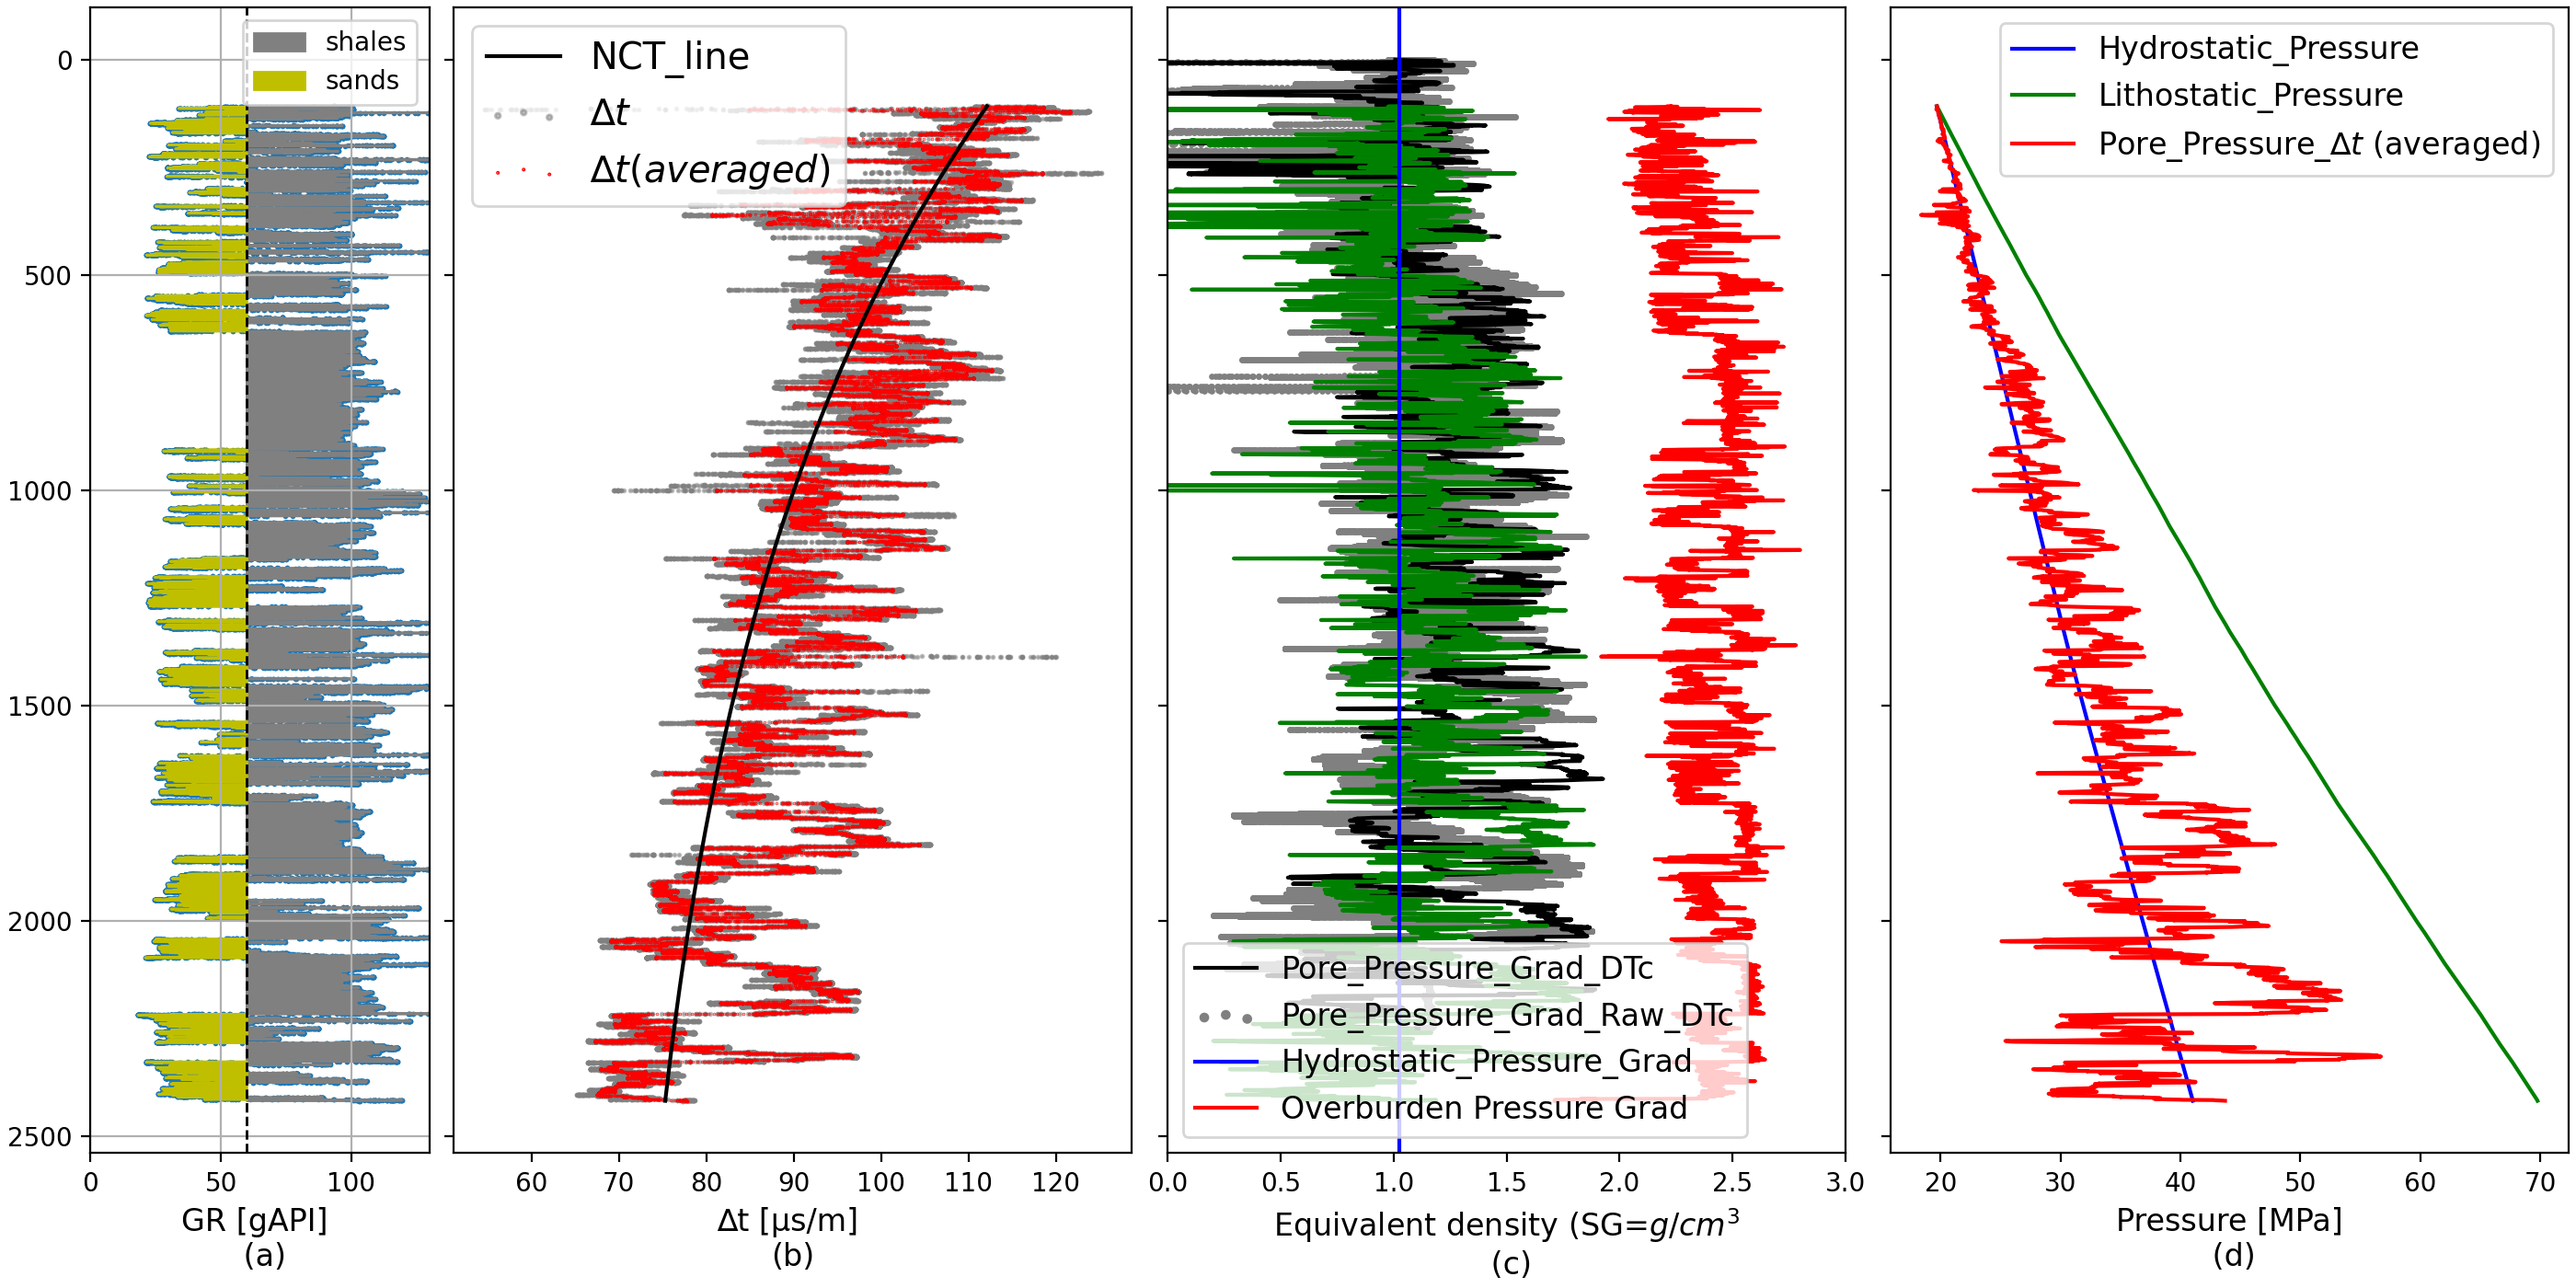

In [41]:
fig = plt.figure(constrained_layout=True,figsize=(14,7))
gs = fig.add_gridspec(1,7)
ax = fig.add_subplot(gs[:1])
ax.scatter(df['GR_1'], df['MD_mbsf'],s=1)
ax.set_xlim(0,130)
ax.set_xlabel('GR [gAPI] \n (a)', fontsize='large')
ax.grid()
ax.fill_betweenx(df['MD_mbsf'],df['GR_1'],60,
                           where=df['GR_1']>60,interpolate=True,color='gray', label='shales')
ax.fill_betweenx(df['MD_mbsf'],df['GR_1'],60,
                           where=df['GR_1']<60,interpolate=True,color='y', label='sands')
ax.axvline(60,color='k',linewidth=1,linestyle='--')
ax.spines["top"].set_position(("axes", 1.0))
ax.legend()
ax.invert_yaxis()



ax_dxc = fig.add_subplot(gs[1:3],sharey=ax)
plt.setp(ax_dxc.get_yticklabels(), visible=False)
ax_dxc.plot(df['DTc_NCT'],df['MD_mbsf'],
          c='k',label='NCT_line')  
ax_dxc.scatter(df['Travel_Time'],
           df['MD_mbsf'],c='gray',alpha = 0.5,
           s=1,label='$∆t$')
ax_dxc.scatter(df['Travel_Time_150'],
        df['MD_mbsf'],c='red',label='$∆t (averaged)$', s=0.05)
ax_dxc.set_xlabel('∆t [μs/m] \n(b)',fontsize='large')
ax_dxc.legend(fontsize='x-large',  markerscale=2, scatterpoints=3, loc='best')
ax_dxc.xaxis.label.set_color("k")
ax_dxc.tick_params(axis='x', colors="k")
ax_dxc.spines["top"].set_edgecolor("k")

ax_ppg = fig.add_subplot(gs[3:5],sharey=ax)
plt.setp(ax_ppg.get_yticklabels(), visible=False)
ax_ppg.plot(ppg_150_DT/g/1000,TVDs,'k',label='Pore_Pressure_Grad_DTc')
ax_ppg.scatter(ppg_raw_DT/g/1000,TVDs,c='gray',s=2,label='Pore_Pressure_Grad_Raw_DTc')
ax_ppg.plot(df['Pore_Pressure_gradient_DT_raw']/g/1000,df['MD_mbsf'],
           c='g')
ax_ppg.axvline(d_seawater,color='b',label='Hydrostatic_Pressure_Grad')
ax_ppg.plot (df['RHOZ_1'],
         df['MD_mbsf'],'r',label='Overburden Pressure Grad')
ax_ppg.set_xlim(0,3)
ax_ppg.legend(fontsize='large',  markerscale=2, scatterpoints=3, loc='best')
ax_ppg.set_xlabel('Equivalent density (SG=$g/{cm^3}$\n (c)', fontsize='large')



ax_pres = fig.add_subplot(gs[5:7],sharey=ax)
plt.setp(ax_pres.get_yticklabels(), visible=False)
ax_pres.plot(df['Hydrostatic_Pressure_at_bit']/1e6,
             df['MD_mbsf'],'b',label='Hydrostatic_Pressure')
ax_pres.plot(df['Lithostatic_Pressure_at_bit']/1e6,
             df['MD_mbsf'],'green',label='Lithostatic_Pressure')
ax_pres.plot(df['Pore_Pressure_Estimated_DT']/1e6,
             df['MD_mbsf'],'r',label='Pore_Pressure_$∆t$ (averaged)')
ax_pres.legend(fontsize='large', loc='upper right', markerscale=2, scatterpoints=3)
ax_pres.set_xlabel('Pressure [MPa]\n (d)', fontsize='large')

# .......................
fig.savefig('Pore_Pressure_DTC_01.png', dpi=400)

# Pore_Pressure_Ratios

## Excess_pore_pressure

$$
P^*=P_{f} - P_{hydro}
$$

In [42]:
df['Excess_pore_pressure'] = (df['Pore_Pressure_Estimated_DT_raw']-\
                                                  df['Hydrostatic_Pressure_at_bit'])

df['Excess_pore_pressure'].describe()

count    1.256470e+05
mean     1.481377e+06
std      4.215392e+06
min     -1.601798e+07
25%     -3.591210e+05
50%      7.484817e+05
75%      2.962950e+06
max      1.690844e+07
Name: Excess_pore_pressure, dtype: float64

<IPython.core.display.Javascript object>


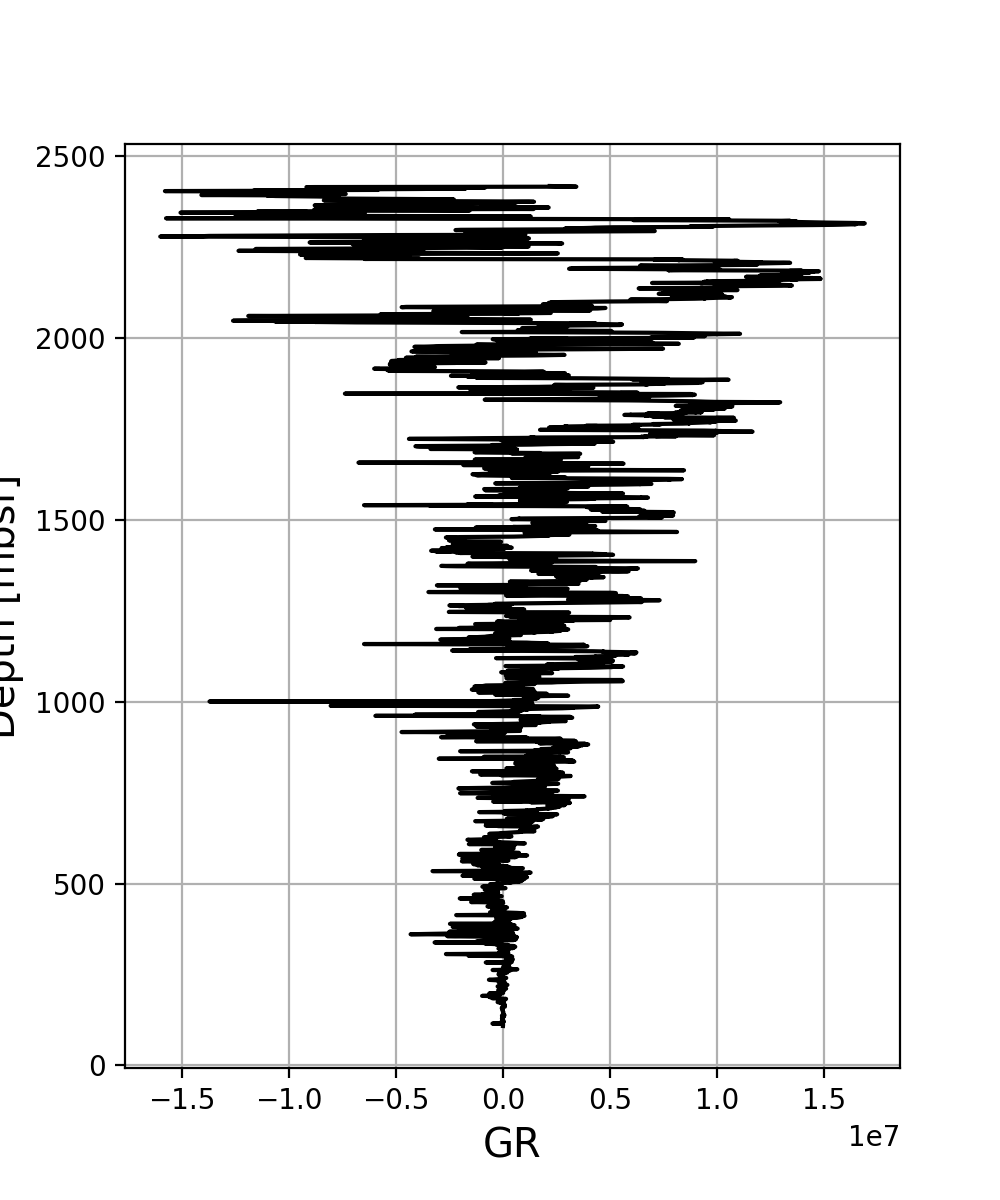

In [43]:
fig=plt.subplots(figsize=(5,6))

ax1 = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan=1)
# ax2 = ax1.twiny()

ax1.plot(df['Excess_pore_pressure'],
         df['MD_mbsf'],'k')
ax1.xaxis.label.set_color("k")
ax1.tick_params(axis='x', colors="k")
ax1.spines["top"].set_edgecolor("k")
# ax1.legend(fontsize='x-large')
# ax1.set_ylim(871,0)
# ax1.set_xlim(-1,1)
ax1.set_xlabel('GR', fontsize='x-large')
ax1.set_ylabel('Depth [mbsf]', fontsize='x-large')
ax1.grid()

## Lithostatic_Load

$$
\lambda^* = \frac{(P_{f} - P_{hydro})} {(P_{litho} - P_{hydro})}
$$ 


In [44]:
# ..............
df['Lithostatic_Load']=(df['Pore_Pressure_Estimated_DT'] - df['Hydrostatic_Pressure_at_bit'])\
                                    /(df['Lithostatic_Pressure_at_bit']- df['Hydrostatic_Pressure_at_bit'] )

df['Lithostatic_Load'].describe()

count    125647.000000
mean          0.088713
std           0.237079
min          -1.513667
25%          -0.054052
50%           0.089814
75%           0.249716
max           0.629905
Name: Lithostatic_Load, dtype: float64

In [45]:
df=df[(df['Lithostatic_Load']>-0.5)&(df['Lithostatic_Load']<1)].copy()
                                                    
df['Lithostatic_Load']                                                    

56103    -0.008792
56104    -0.007341
56105    -0.007323
56106    -0.005280
56107    -0.004344
            ...   
181745    0.091120
181746    0.091462
181747    0.092065
181748    0.093229
181749    0.093405
Name: Lithostatic_Load, Length: 123731, dtype: float64

<IPython.core.display.Javascript object>


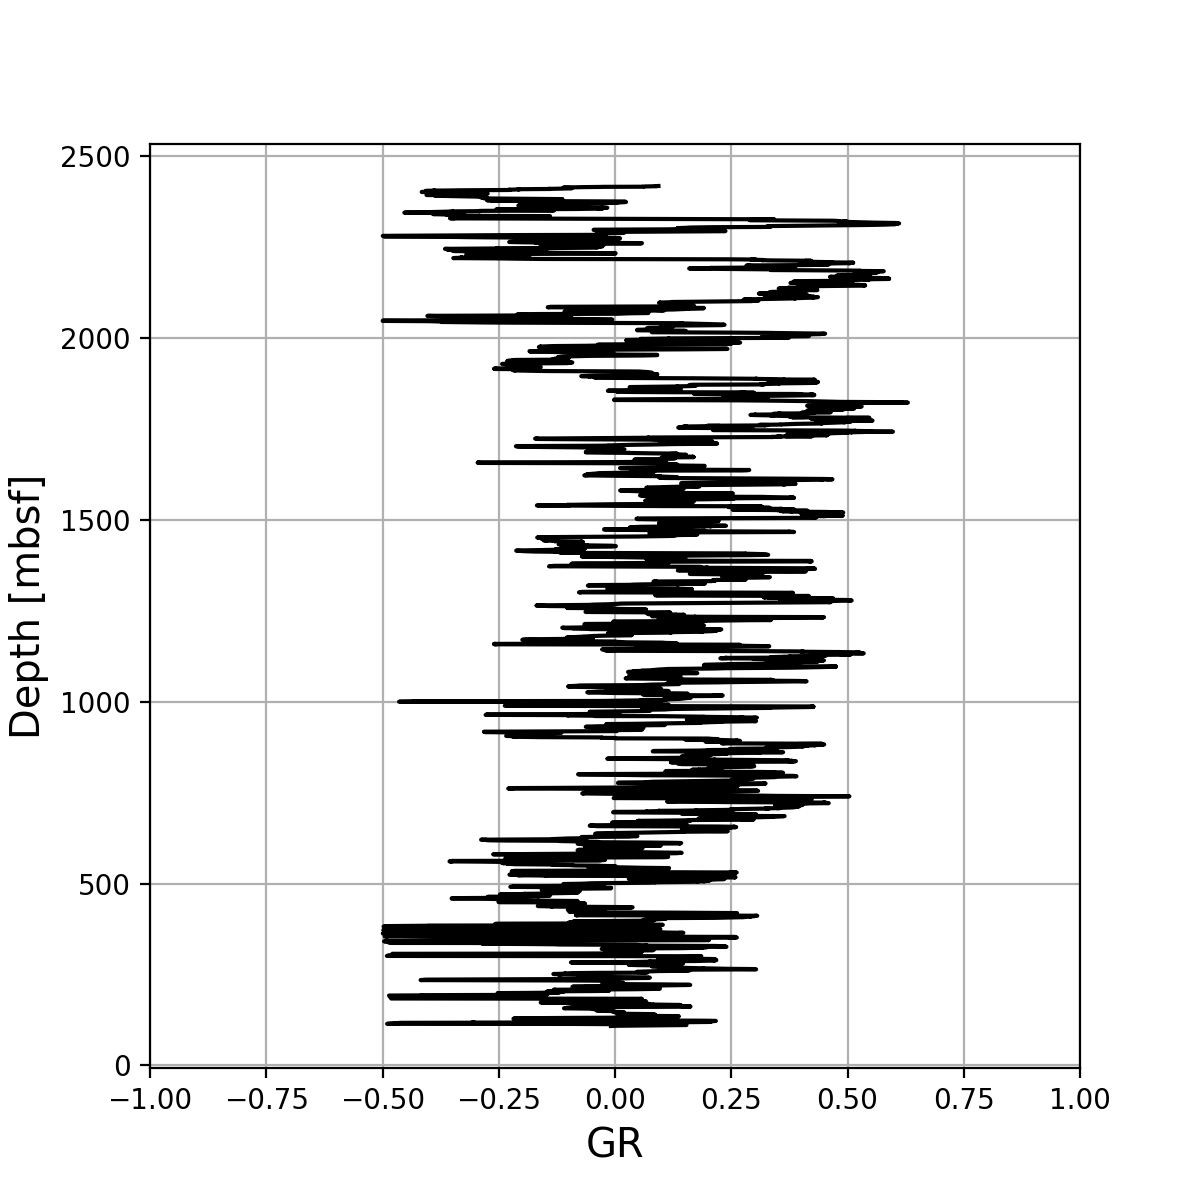

In [46]:
fig=plt.subplots(figsize=(6,6))

ax1 = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan=1)
# ax2 = ax1.twiny()

ax1.plot(df['Lithostatic_Load'],
         df['MD_mbsf'],'k')
ax1.xaxis.label.set_color("k")
ax1.tick_params(axis='x', colors="k")
ax1.spines["top"].set_edgecolor("k")
# ax1.legend(fontsize='x-large')
# ax1.set_ylim(871,0)
ax1.set_xlim(-1,1)
ax1.set_xlabel('GR', fontsize='x-large')
ax1.set_ylabel('Depth [mbsf]', fontsize='x-large')
ax1.grid()

## Lithostatic_Load_lamda

$$
\lambda = \frac{P_{f}}{P_{litho}}
$$

In [47]:
df['Lithostatic_Load_lamda'] = df['Pore_Pressure_Estimated_DT']\
                            /df['Lithostatic_Pressure_at_bit']

df['Lithostatic_Load_lamda'].describe()

count    123731.000000
mean          0.754112
std           0.116921
min           0.394855
25%           0.684860
50%           0.763928
75%           0.831399
max           0.999981
Name: Lithostatic_Load_lamda, dtype: float64

<IPython.core.display.Javascript object>


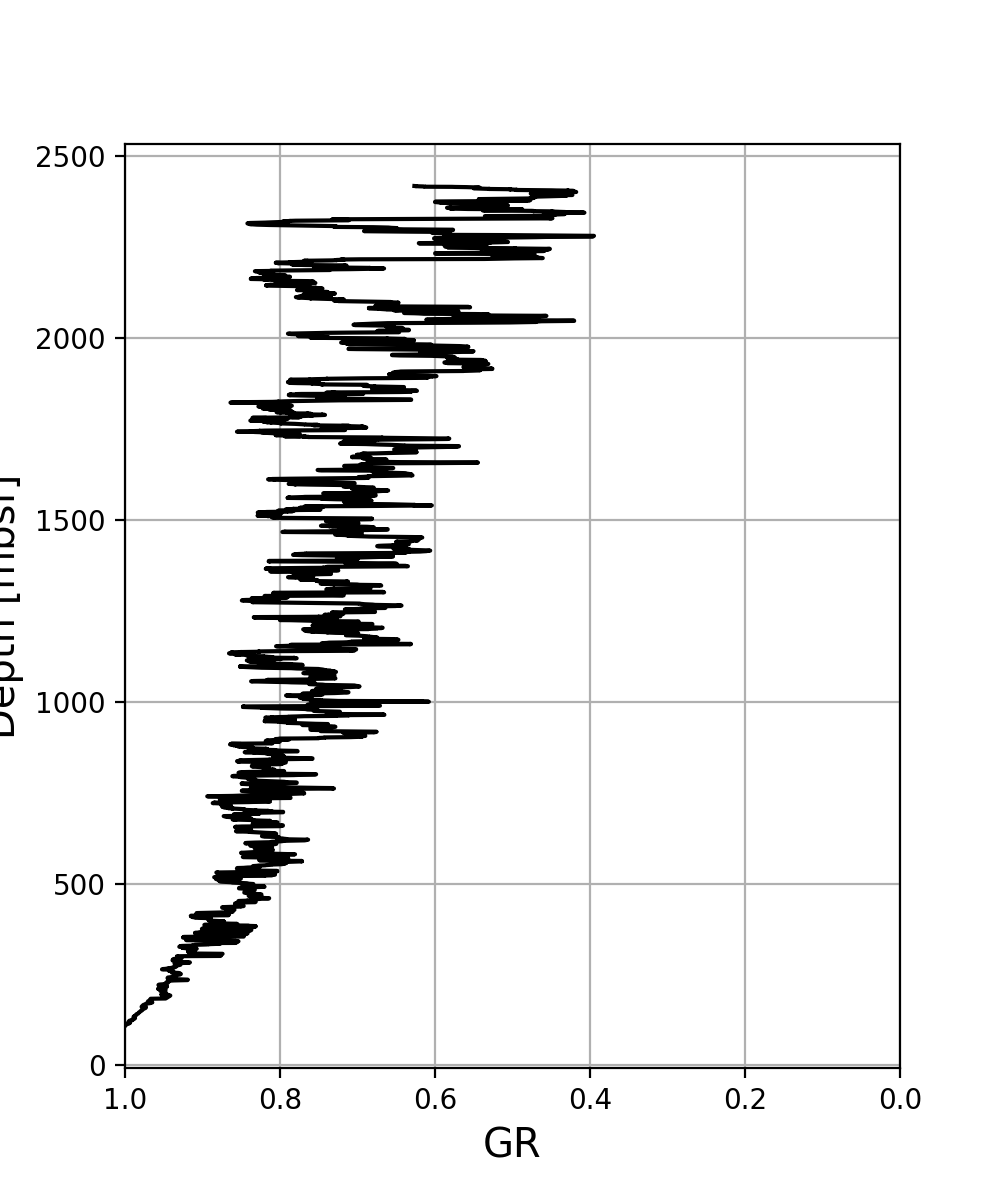

In [48]:
fig=plt.subplots(figsize=(5,6))

ax1 = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan=1)
# ax2 = ax1.twiny()

ax1.plot(df['Lithostatic_Load_lamda'],
         df['MD_mbsf'],'k')
ax1.xaxis.label.set_color("k")
ax1.tick_params(axis='x', colors="k")
ax1.spines["top"].set_edgecolor("k")
# ax1.legend(fontsize='x-large')
# ax1.set_ylim(871,0)
ax1.set_xlim(1,0)
ax1.set_xlabel('GR', fontsize='x-large')
ax1.set_ylabel('Depth [mbsf]', fontsize='x-large')
ax1.grid()

In [49]:
# df=df[df['Porosity']>0].copy()
df['Void_Ratio']= df['PHIT_1']/ (1-df['PHIT_1'])
# df=df[df['Void_Ratio']>0].copy()
df['Void_Ratio']

56103     0.344357
56104     0.344339
56105     0.344339
56106     0.344321
56107     0.344285
            ...   
181745    0.178384
181746    0.178481
181747    0.178662
181748    0.178773
181749    0.178787
Name: Void_Ratio, Length: 123731, dtype: float64

## Effective Stress Estimation

$$
σ_{v} = σ_{e} - P_{f}
$$

if
σv is the effective stress, 
Pf is the pore pressure, 

In [50]:
df['effective_stress'] = df['Lithostatic_Pressure_at_bit'] - df['Pore_Pressure_Estimated_DT']
df['effective_stress']
df=df[df['effective_stress']>0].copy()
df['effective_stress']

56103     3.729844e+02
56104     4.565016e+02
56105     4.578047e+02
56106     6.707252e+02
56107     8.529862e+02
              ...     
181745    2.611982e+07
181746    2.611013e+07
181747    2.609311e+07
181748    2.605983e+07
181749    2.605481e+07
Name: effective_stress, Length: 123731, dtype: float64

<IPython.core.display.Javascript object>


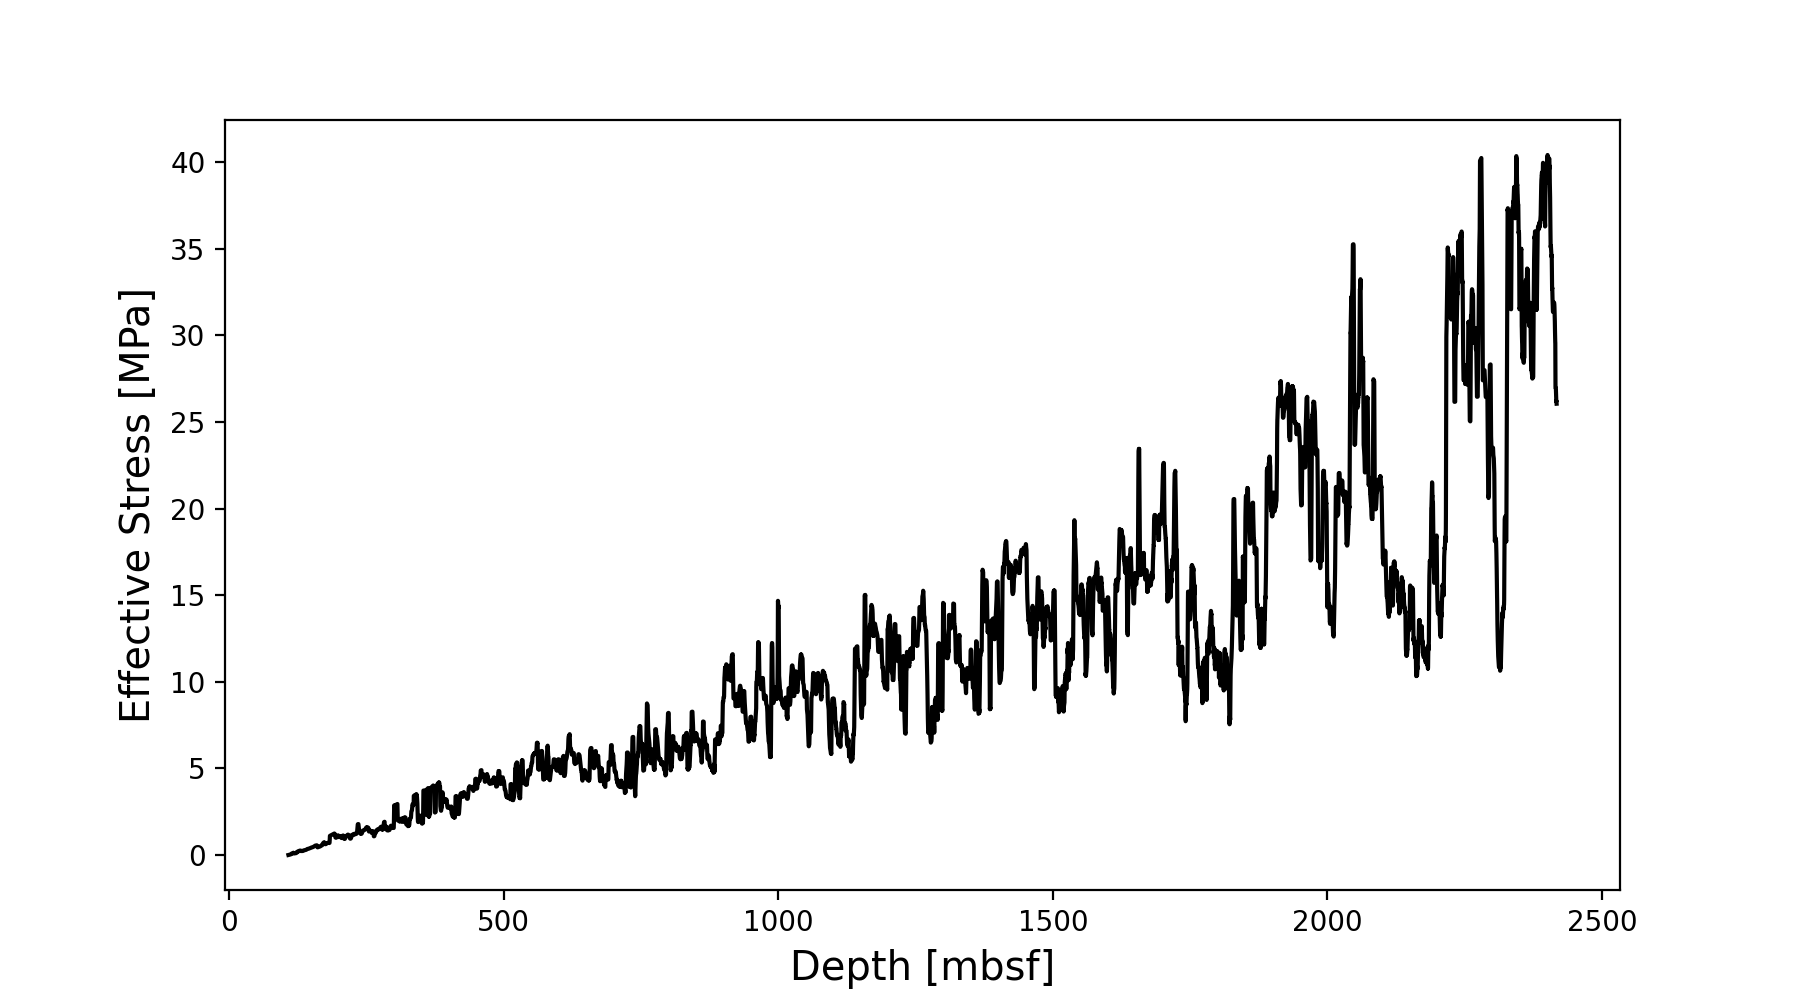

Text(0, 0.5, 'Effective Stress [MPa]')

In [51]:
fig=plt.subplots(figsize=(9,5))

ax1 = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan=1)
ax1.plot(df['MD_mbsf'],df['effective_stress']/1e6,'k')

ax1.xaxis.label.set_color("k")
ax1.tick_params(axis='x', colors="k")
ax1.spines["top"].set_edgecolor("k")
ax1.set_xlabel('Depth [mbsf]', fontsize='x-large')
ax1.set_ylabel('Effective Stress [MPa]', fontsize='x-large')
# ax1.grid()

# Plots

<IPython.core.display.Javascript object>


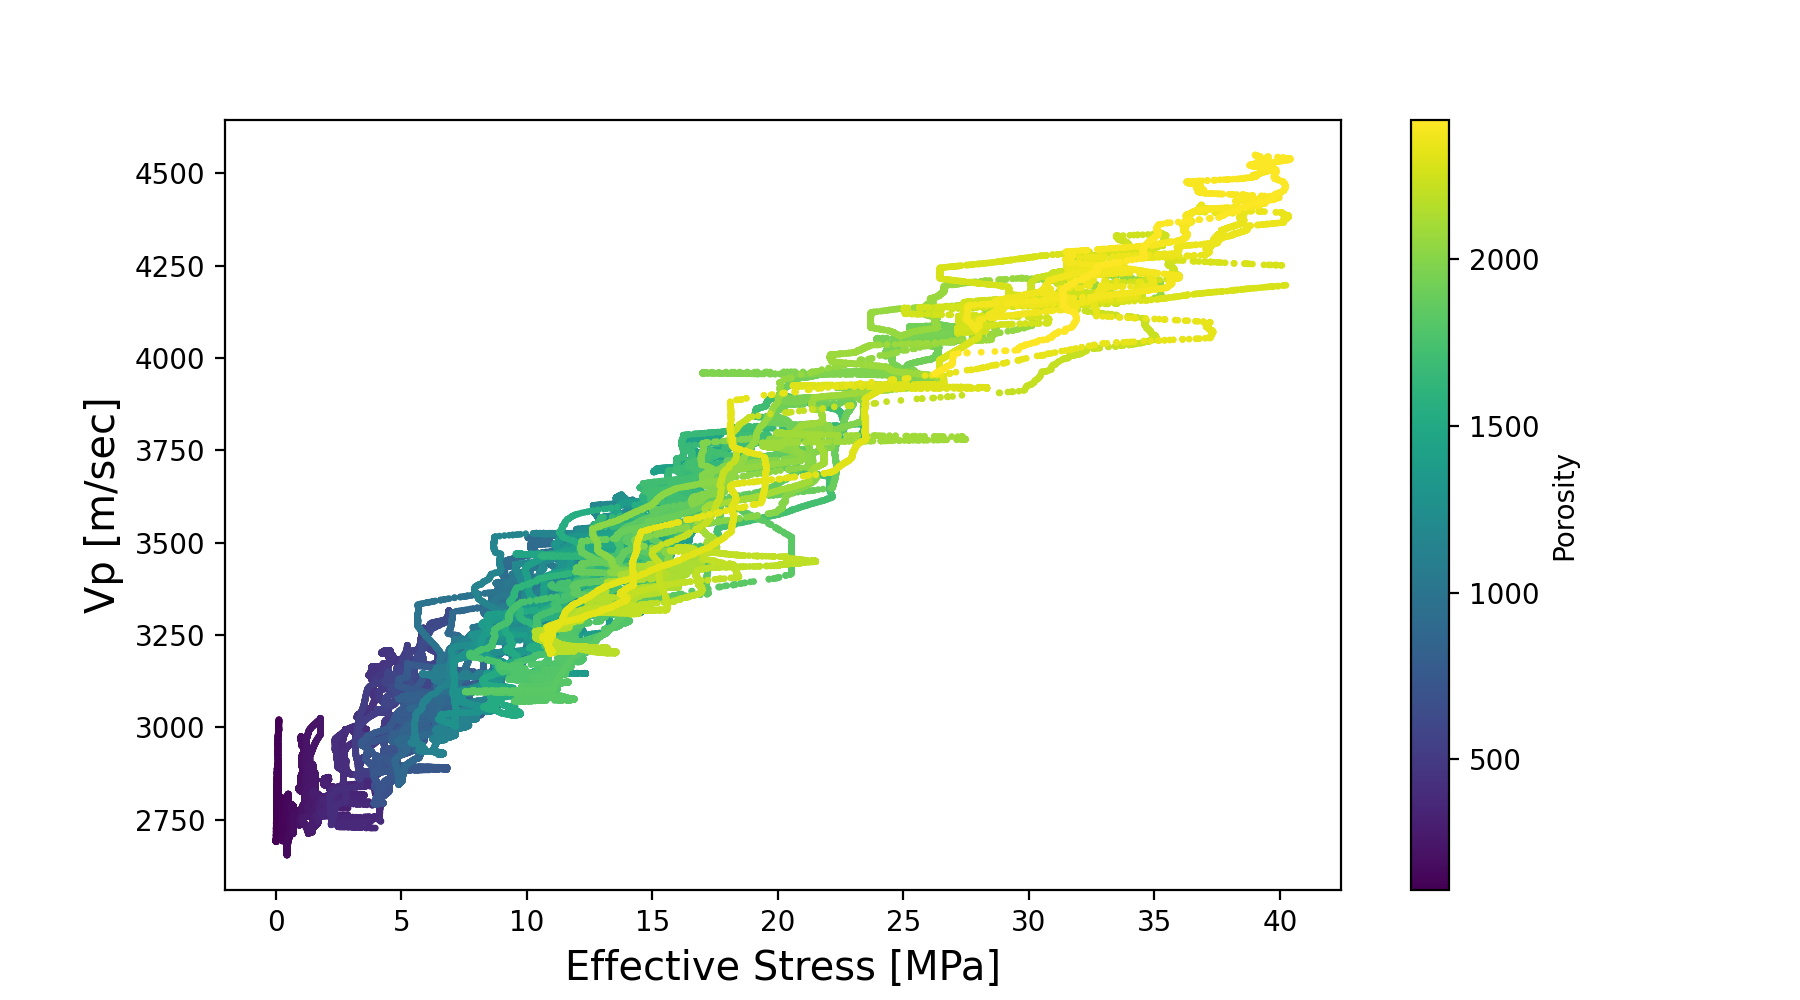

In [52]:
fig=plt.subplots(figsize=(9,5))

ax1 = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan=1)
h=ax1.scatter(df['effective_stress']/1e6,
             df['P_S_LCD_JPD_24102007VP_1'],c=df['MD_mbsf'], s=2)
ax1.xaxis.label.set_color("k")
ax1.tick_params(axis='x', colors="k")
ax1.spines["top"].set_edgecolor("k")
ax1.set_ylabel('Vp [m/sec]', fontsize='x-large')
ax1.set_xlabel('Effective Stress [MPa]', fontsize='x-large')
plt.colorbar(h, label='Porosity')

<IPython.core.display.Javascript object>


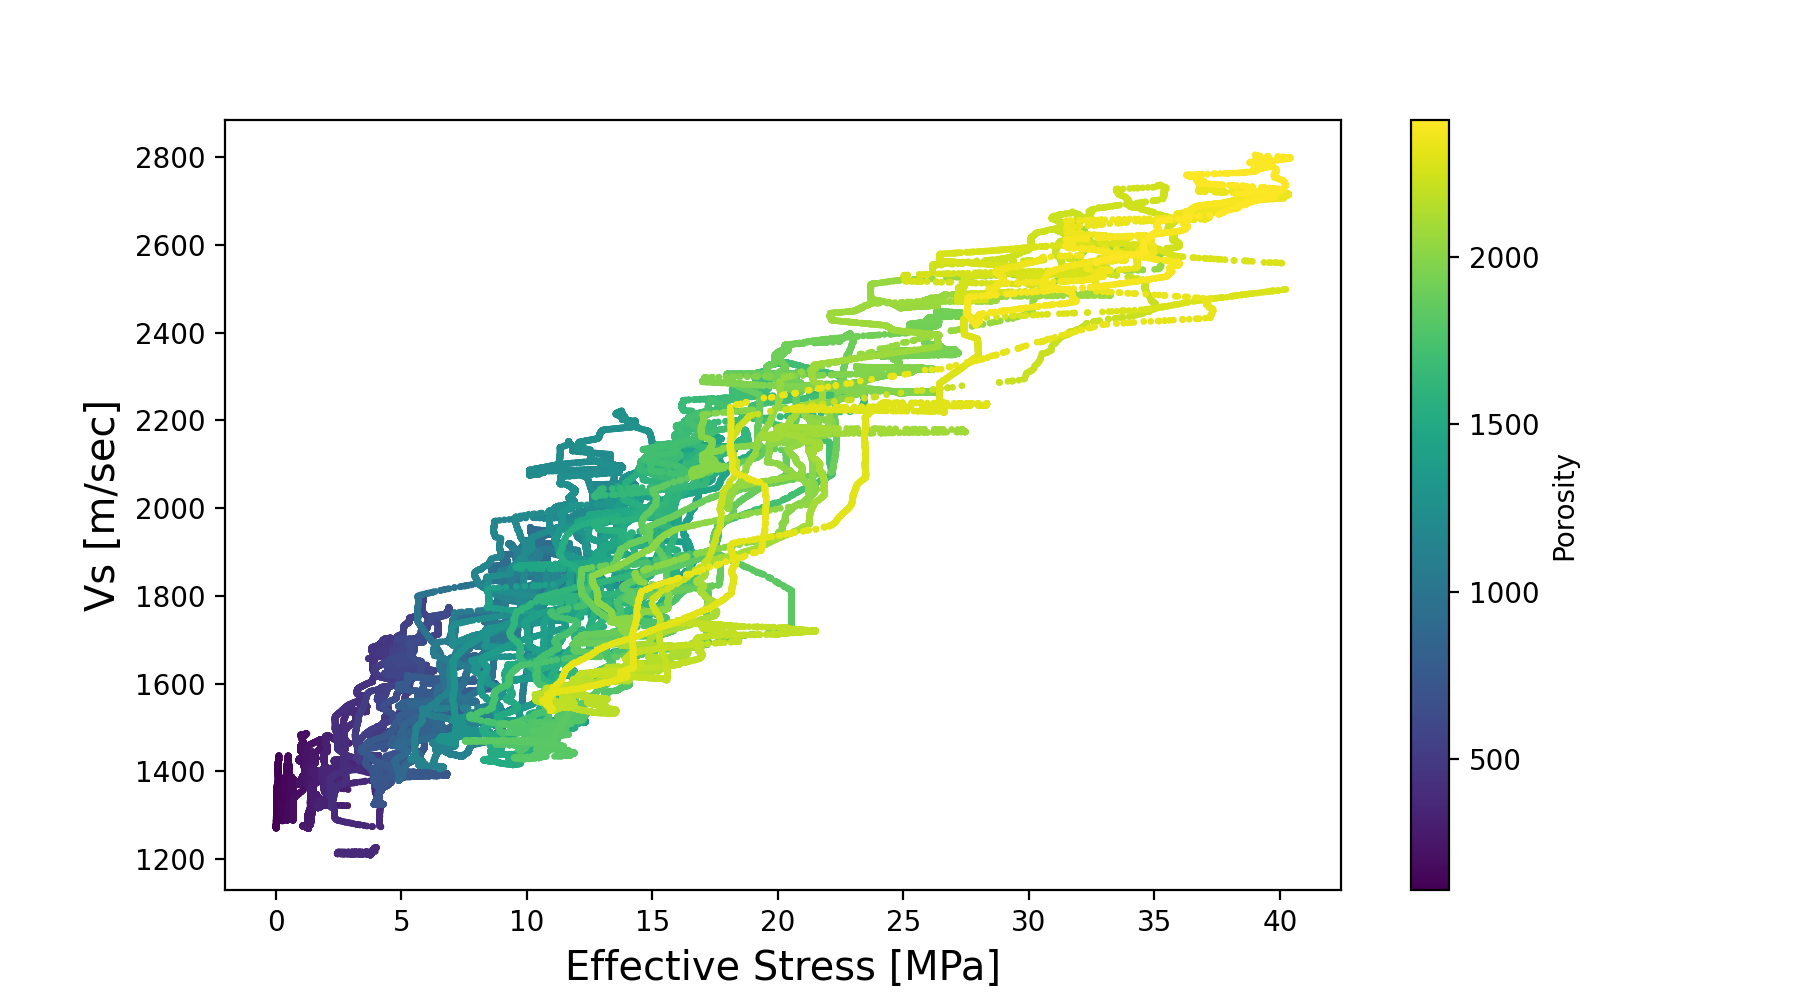

In [53]:
fig=plt.subplots(figsize=(9,5))

ax1 = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan=1)
h=ax1.scatter(df['effective_stress']/1e6,
             df['P_S_LCD_JPD_24102007VS_1'],c=df['MD_mbsf'], s=2)
ax1.xaxis.label.set_color("k")
ax1.tick_params(axis='x', colors="k")
ax1.spines["top"].set_edgecolor("k")
ax1.set_ylabel('Vs [m/sec]', fontsize='x-large')
ax1.set_xlabel('Effective Stress [MPa]', fontsize='x-large')
plt.colorbar(h, label='Porosity')

<IPython.core.display.Javascript object>


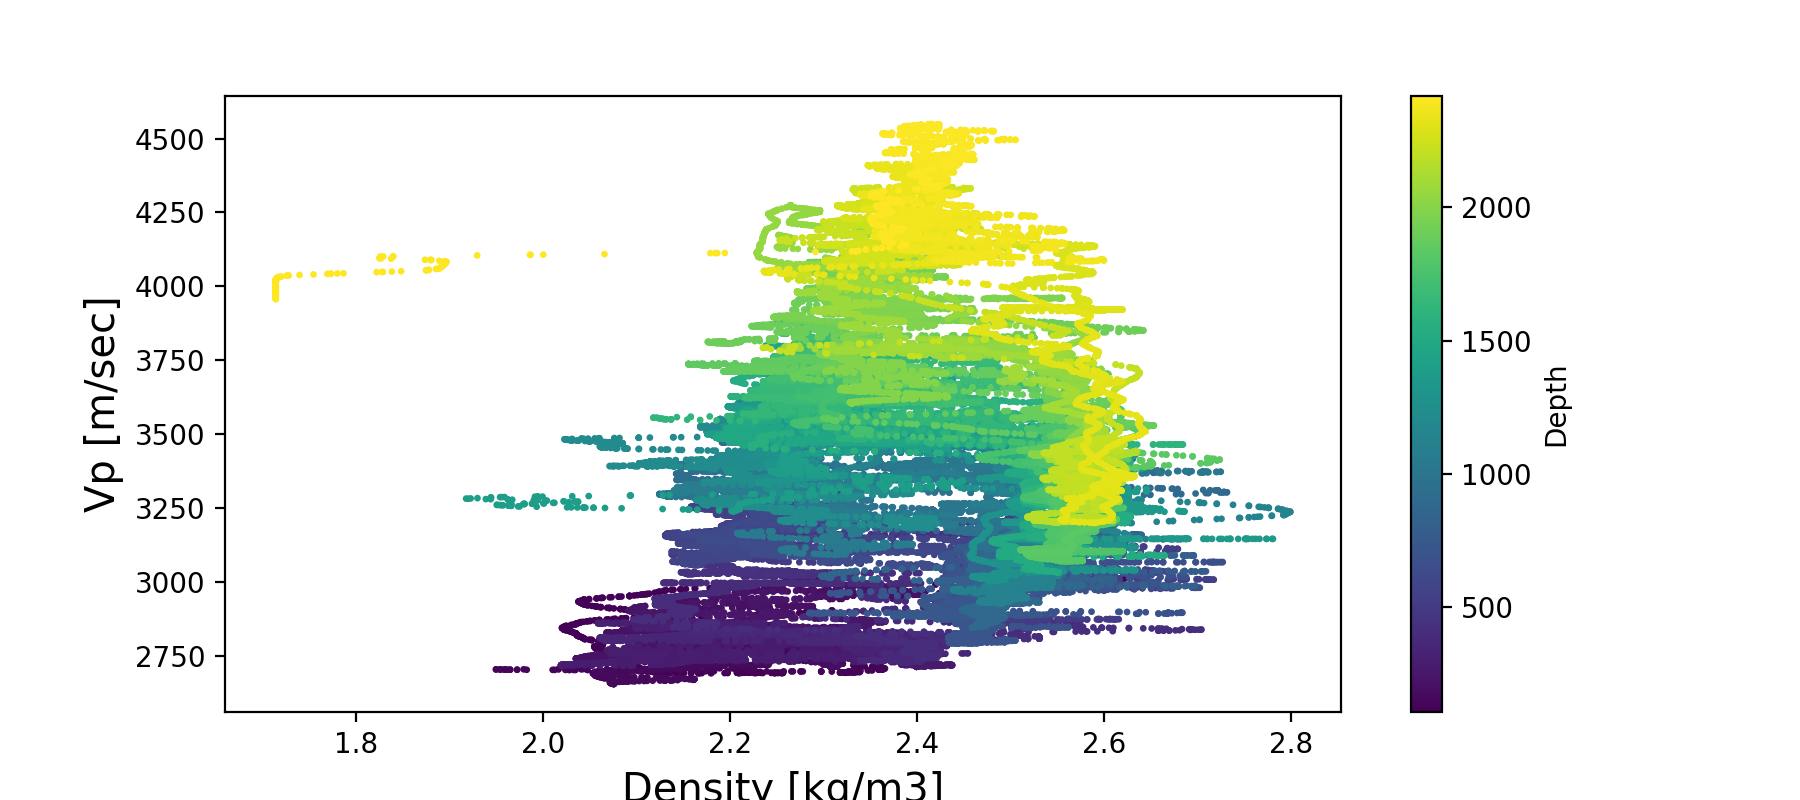

In [54]:
fig=plt.subplots(figsize=(9,4))

ax1 = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan=1)
h=ax1.scatter(df['RHOZ_1'],
         df['P_S_LCD_JPD_24102007VP_1'],c=df['MD_mbsf'], s=2)
ax1.xaxis.label.set_color("k")
ax1.tick_params(axis='x', colors="k")
ax1.spines["top"].set_edgecolor("k")
ax1.set_xlabel('Density [kg/m3]', fontsize='x-large')
ax1.set_ylabel('Vp [m/sec]', fontsize='x-large')
plt.colorbar(h, label='Depth')

<IPython.core.display.Javascript object>


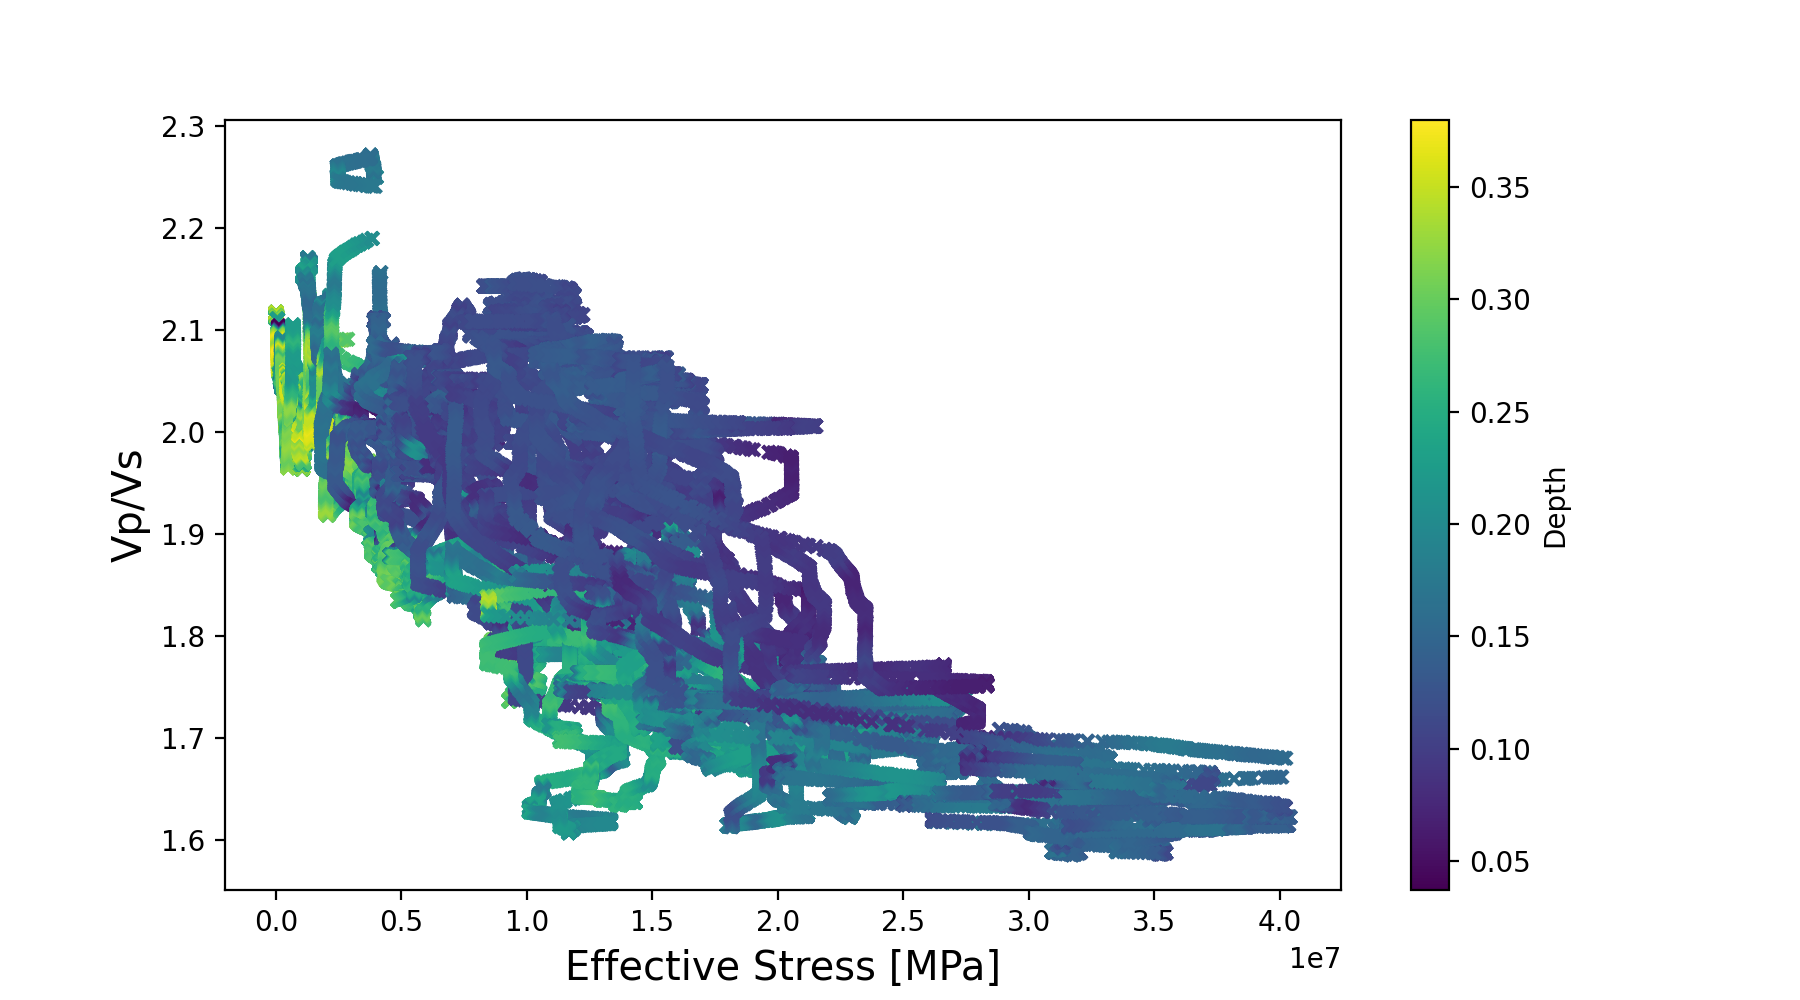

In [55]:
fig=plt.subplots(figsize=(9,5))

ax1 = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan=1)
h=ax1.scatter(df['effective_stress'],
         df['P_S_LCD_JPD_24102007VP_1']/df['P_S_LCD_JPD_24102007VS_1'],c=df['PHIT_1'], s=20, marker='x')
ax1.xaxis.label.set_color("k")
ax1.tick_params(axis='x', colors="k")
ax1.spines["top"].set_edgecolor("k")
ax1.set_ylabel('Vp/Vs', fontsize='x-large')
ax1.set_xlabel('Effective Stress [MPa]', fontsize='x-large')
plt.colorbar(h, label='Depth')

<IPython.core.display.Javascript object>


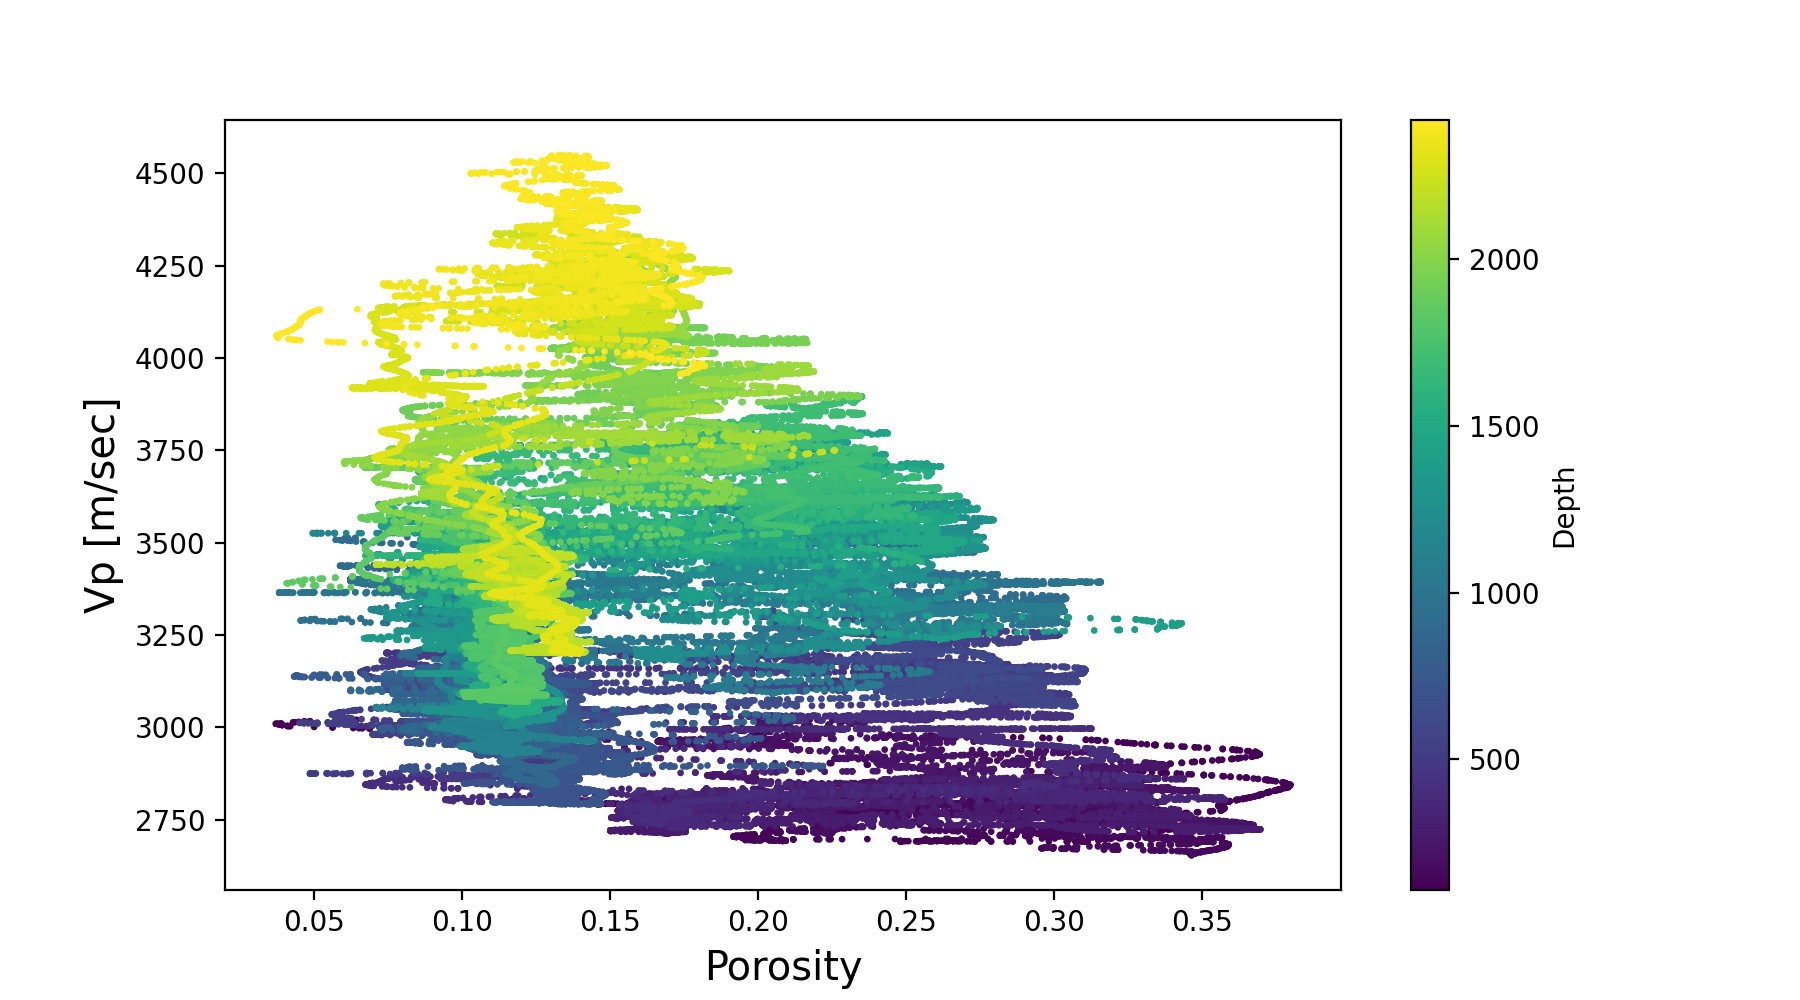

In [59]:
fig=plt.subplots(figsize=(9,5))

ax1 = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan=1)
h=ax1.scatter(df['PHIT_1'],
         df['P_S_LCD_JPD_24102007VP_1'],c=df['MD_mbsf'], s=2)
ax1.xaxis.label.set_color("k")
ax1.tick_params(axis='x', colors="k")
ax1.spines["top"].set_edgecolor("k")
ax1.set_xlabel('Porosity', fontsize='x-large')
ax1.set_ylabel('Vp [m/sec]', fontsize='x-large')
plt.colorbar(h, label='Depth')

# EXPORT

In [57]:
import pickle

In [58]:
pickle.dump(df, open("0a_time_series_df.pickle","wb"))
pickle.dump(pore_pressure_150_DT, open("0a_pore_pressure_150_DT.pickle","wb"))
pickle.dump(ppg_raw_DT, open("0a_ppg_raw_DT.pickle","wb"))
